# Introduction

- Lending Club case study is about a __consumer finance company__, which is the largest online loan marketplace,which specialises in lending various types of loans to __urban customers__. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant's profile. 

- Two types of risks are associated with the bank's decision:
  - If the applicant is __likely to repay the loan__, then not approving the loan results in a __loss of business__
     to the company.
   
  - If the applicant is __not likely  to repay the loan__, i.e. the borrower is likely to default, then approving the     loan may lead to a financial loss for the company.
  
## Analysis Approach

- The analysis is to identify patterns which indicate if a person is likely to default or not.
- This pattern will be used by consumer finance company for taking actions such as __denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc__.

# Import Pakages 


In [70]:
import numpy as np                   # Implemennts milti-dimensional array and matrices
import pandas as pd                  # For data manipulation and analysis
pd.set_option('display.max_rows', 130, 'display.max_columns', 130)
pd.options.display.float_format = '{:,.2f}'.format

import matplotlib.pyplot as plt
import seaborn as sns

# Loading DataSet Loan.csv

In [71]:
loan_df = pd.read_csv("loan.csv")       # Reading csv file
loan_df                                 # To view the dataframe

C:\Users\amitr\AppData\Local\Temp\ipykernel_35996\4282281095.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv("loan.csv")       # Reading csv file


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [72]:
# Display the first few rows of the dataframe
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [73]:
# Display basic information about the dataset
print(loan_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


### Univariate analysis is a statistical method that involves the analysis of a single variable. 
The primary goal of univariate analysis is to describe and summarize the key characteristics of a single variable in a dataset. This analysis provides insights into the distribution, central tendency, dispersion, and shape of the variable's values.

In [74]:
# Display summary statistics
print(loan_df.describe())

                id    member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
count    39,717.00    39,717.00  39,717.00    39,717.00        39,717.00   
mean    683,131.91   850,463.56  11,219.44    10,947.71        10,397.45   
std     210,694.13   265,678.31   7,456.67     7,187.24         7,128.45   
min      54,734.00    70,699.00     500.00       500.00             0.00   
25%     516,221.00   666,780.00   5,500.00     5,400.00         5,000.00   
50%     665,665.00   850,812.00  10,000.00     9,600.00         8,975.00   
75%     837,755.00 1,047,339.00  15,000.00    15,000.00        14,400.00   
max   1,077,501.00 1,314,167.00  35,000.00    35,000.00        35,000.00   

       installment   annual_inc       dti  delinq_2yrs  inq_last_6mths  \
count    39,717.00    39,717.00 39,717.00    39,717.00       39,717.00   
mean        324.56    68,968.93     13.32         0.15            0.87   
std         208.87    63,793.77      6.68         0.49            1.07   
min          15.69 

In [75]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,"39,717.00","683,131.91","210,694.13","54,734.00","516,221.00","665,665.00","837,755.00","1,077,501.00"
member_id,"39,717.00","850,463.56","265,678.31","70,699.00","666,780.00","850,812.00","1,047,339.00","1,314,167.00"
loan_amnt,"39,717.00","11,219.44","7,456.67",500.00,"5,500.00","10,000.00","15,000.00","35,000.00"
funded_amnt,"39,717.00","10,947.71","7,187.24",500.00,"5,400.00","9,600.00","15,000.00","35,000.00"
funded_amnt_inv,"39,717.00","10,397.45","7,128.45",0.00,"5,000.00","8,975.00","14,400.00","35,000.00"
installment,"39,717.00",324.56,208.87,15.69,167.02,280.22,430.78,"1,305.19"
annual_inc,"39,717.00","68,968.93","63,793.77","4,000.00","40,404.00","59,000.00","82,300.00","6,000,000.00"
dti,"39,717.00",13.32,6.68,0.00,8.17,13.40,18.60,29.99
delinq_2yrs,"39,717.00",0.15,0.49,0.00,0.00,0.00,0.00,11.00
inq_last_6mths,"39,717.00",0.87,1.07,0.00,0.00,1.00,1.00,8.00


In [76]:
loan_df.shape

(39717, 111)

# Observations
### Dataset has 39717 rows and 111 columns

In [77]:
loan_df.info(verbose = True,null_counts = True)     # info(verbose = True) gives display of all columns.
                                                    # info(null_counts = True) shows the count of columns having non-null.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

C:\Users\amitr\AppData\Local\Temp\ipykernel_35996\4083634598.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  loan_df.info(verbose = True,null_counts = True)     # info(verbose = True) gives display of all columns.


In [78]:
#The dataset contains missing values in the following columns along with their respective counts
loan_df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [79]:
# To check if a column has any non-null values
loan_df['tot_cur_bal'].isnull().any()

True

# List of columns which has missing values

In [80]:
loan_df.columns[loan_df.isnull().any()]

Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', '

# Out of 111 columns below 68 cikymns have null values .

In [81]:
# To display all the columns having zero non-null values
loan_df_notull_columns = loan_df.columns[loan_df.notna().all()]
loan_df_notull_columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt'],
      dtype='object')

# There are 43 columns having zero non-null values

In [82]:
loan_df_notull = loan_df.loc[:,loan_df.notna().all()]
loan_df_notull

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,RENT,"80,000.00",Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,38,f,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,67.79,1,INDIVIDUAL,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,"1,075.00",36 months,8.07%,78.42,A,A4,MORTGAGE,"110,000.00",Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,40,f,0.00,0.00,"2,822.97","1,213.88","2,500.00",322.97,0.00,0.00,0.00,80.90,1,INDIVIDUAL,0,0
39713,90665,90607,8500,8500,875.00,36 months,10.28%,275.38,C,C1,RENT,"18,000.00",Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,274xx,NC,6.40,1,Dec-86,1,6,0,8847,9,f,0.00,0.00,"9,913.49","1,020.51","8,500.00","1,413.49",0.00,0.00,0.00,281.94,1,INDIVIDUAL,0,0
39714,90395,90390,5000,5000,"1,325.00",36 months,8.07%,156.84,A,A4,MORTGAGE,"100,000.00",Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,20,f,0.00,0.00,"5,272.16","1,397.12","5,000.00",272.16,0.00,0.00,0.00,0.00,1,INDIVIDUAL,0,0
39715,90376,89243,5000,5000,650.00,36 months,7.43%,155.38,A,A2,MORTGAGE,"200,000.00",Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,208xx,MD,3.72,0,Nov-88,0,17,0,85607,26,f,0.00,0.00,"5,174.20",672.66,"5,000.00",174.20,0.00,0.00,0.00,0.00,1,INDIVIDUAL,0,0


In [83]:
# To display a dataframe which contains missing values
loan_nullval = loan_df[[col for col in loan_df.columns if loan_df[col].isnull().any()]]
loan_nullval   #loan_nullval is the dataframe which has missing values in it.

,emp_title,emp_length,desc,title,mths_since_last_delinq,mths_since_last_record,revol_util,last_pymnt_d,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,NaN,10+ years,Borrower added on 12/22/11 > I need to upgra...,Computer,NaN,NaN,83.70%,Jan-15,NaN,May-16,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,Ryder,< 1 year,Borrower added on 12/22/11 > I plan to use t...,bike,NaN,NaN,9.40%,Apr-13,NaN,Sep-13,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,NaN,10+ years,NaN,real estate business,NaN,NaN,98.50%,Jun-14,NaN,May-16,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,AIR RESOURCES BOARD,10+ years,Borrower added on 12/21/11 > to pay for prop...,personel,35.00,NaN,21%,Jan-15,NaN,Apr-16,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,University Medical Group,1 year,Borrower added on 12/21/11 > I plan on combi...,Personal,38.00,NaN,53.90%,May-16,Jun-16,May-16,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,FiSite Research,4 years,Our current gutter system on our home is old a...,Home Improvement,0.00,0.00,13.10%,Jul-10,NaN,Jun-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,"Squarewave Solutions, Ltd.",3 years,The rate of interest and fees incurred by carr...,Retiring credit card debt,5.00,0.00,26.90%,Jul-10,NaN,Jul-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,NaN,< 1 year,NaN,MBA Loan Consolidation,0.00,0.00,19.40%,Apr-08,NaN,Jun-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [84]:
# out of 111 columns 68 columns are null and out of 68 columns there are 54 columns which has completely NULL values.
loan_df.columns[loan_df.isnull().all()]
#The 54 columns that are completely null in the dataset are as follows:

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

# Data Cleaning 
### Dropping all the columns which has null values.

In [85]:

loan_df.dropna(axis=1,how='all', inplace=True ) 
loan_df
#axis = 1 - Denotes columns
# how = 'all' - to represent in all values in a column is null or 0.
# inplace = True - For making permanent changes

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.00,NaN,15,0,27783,53.90%,38,f,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,"1,075.00",36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,"110,000.00",Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.00,0.00,13,0,7274,13.10%,40,f,0.00,0.00,"2,822.97","1,213.88","2,500.00",322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.00,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,"18,000.00",Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.00,0.00,6,0,8847,26.90%,9,f,0.00,0.00,"9,913.49","1,020.51","8,500.00","1,413.49",0.00,0.00,0.

# Now we have 39717 rows and 57 columns

In [86]:
loan_df.isnull().sum().sort_values(ascending=False)     # To get the count of number of missing values in the Loan dataset.

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

# Observations

- We can see the count of missing values in each column.
   - **emp_title** has **2459** missing values.
   - **emp_length** has **1075** missing values.
   - **desc** has **12940** missing values.
   - **title** has **11** missing values.
   - **mths_since_last_delinq** has **25682** missing values.
   - **mths_since_last_record** has **36931** missing values.
   - **revol_util** has **50** missing values.
   - **last_pymnt_d** has **71** missing values.
   - **next_pymnt_d** has **38577** missing values.
   - **last_credit_pull_d** has **2** missing values.
   - **collections_12_mths_ex_med** has **56** missing values.
   - **chargeoff_within_12_mths** has **56** missing values.
   - **pub_rec_bankruptcies** has **697** missing values.
   - **tax_liens** has **39** missing values.

In [87]:
loan_df.head(100)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.00,NaN,15,0,27783,53.90%,38,f,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
5,1075269,1311441,5000,5000,"5,000.00",36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,"36,000.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,f,0.00,0.00,"5,632.21","5,632.21","5,000.00",632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
6,1069639,1304742,7000,7000,"7,000.00",60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,"47,004.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,NaN,NaN,7,0,17726,85.60%,11,f,0.00,0.00,"10,110.84","10,110.84","6,985.61","3,125.23",0.00,0.00,0.00,May-16,"1,313.76",NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
7,1072053,1288686,3000,3000,"3,000.00",36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,"48,000.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower 

In [88]:
unique_col = loan_df.drop(loan_df[[col for col in list(loan_df) if len(loan_df[col].unique()) == 1]],inplace = True,axis =1)
unique_col
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,0.00,0.00,0.00
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,0.00,0.00,0.00
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,0.00,0.00,0.00
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,0.00,0.00,0.00
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.00,NaN,15,0,27783,53.90%,38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,"1,075.00",36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,"110,000.00",Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.00,0.00,13,0,7274,13.10%,40,0.00,0.00,"2,822.97","1,213.88","2,500.00",322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.00,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,"18,000.00",Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.00,0.00,6,0,8847,26.90%,9,0.00,0.00,"9,913.49","1,020.51","8,500.00","1,413.49",0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,"1,325.00",36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,"100,000.00",Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_conso

In [89]:
##Still there are 3 columns having unique values. We can drop these columns also.
loan_df.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,"1,075.00",36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,"110,000.00",Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.10%,40,0.00,0.00,"2,822.97","1,213.88","2,500.00",322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN
39713,90665,90607,8500,8500,875.00,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,"18,000.00",Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.90%,9,0.00,0.00,"9,913.49","1,020.51","8,500.00","1,413.49",0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN
39714,90395,90390,5000,5000,"1,325.00",36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,"100,000.00",Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.40%,20,0.00,0.00,"5,272.16","1,397.12","5,000.00",272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN
39715,90376,89243,5000,5000,650.00,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,"200,000.00",Not Verified,Jul-07,Full

In [90]:
data =[]
for row in loan_df.columns.tolist():
    data.append({'Column' : row,'Count' : len(loan_df[row].unique())})

In [91]:
unique_count = pd.DataFrame(data).sort_values('Count')
unique_count


,Column,Count
5,term,2
43,next_pymnt_d,3
16,loan_status,3
14,verification_status,3
45,pub_rec_bankruptcies,4
28,pub_rec,5
12,home_ownership,5
8,grade,7
26,inq_last_6mths,9
24,delinq_2yrs,11


# - Droping the columns **id** and **member_id** as it is refering to borrower's identity and it has no use for analysing the data.

In [92]:
loan_df.drop(['id','member_id'],axis=1,inplace=True)
loan_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00
1,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00
2,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00
3,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00
4,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,"1,075.00",36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,"110,000.00",Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.10%,40,0.00,0.00,"2,822.97","1,213.88","2,500.00",322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN
39713,8500,8500,875.00,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,"18,000.00",Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.90%,9,0.00,0.00,"9,913.49","1,020.51","8,500.00","1,413.49",0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN
39714,5000,5000,"1,325.00",36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,"100,000.00",Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.40%,20,0.00,0.00,"5,272.16","1,397.12","5,000.00",272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN
39715,5000,5000,650.00,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,"200,000.00",Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,17,0,85607,0.70%,26,0.00,0.00,"5,174.20",672.66,

- **Dropping columns url** as it is loan link for the particular borrower.
- **Dropping column desc** which is the description containing text provided by the borrower and it is not required     for now.
- **Dropping column emp_title** which is the Eemployer name for the loans listed after 9/23/2013, with the help of employer name we are not deciding to lend money.
- **Dropping column title** which is provided by the borrower and it is not required for our analysis to judge defaulters or not.

In [93]:
loan_df.drop(['url','desc','zip_code','emp_title','title','next_pymnt_d','out_prncp','out_prncp_inv'],axis=1,inplace=True)
loan_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,May-16,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,"1,075.00",36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,"110,000.00",Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,0,Nov-90,0,13,0,7274,13.10%,40,"2,822.97","1,213.88","2,500.00",322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN
39713,8500,8500,875.00,36 months,10.28%,275.38,C,C1,3 years,RENT,"18,000.00",Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,1,Dec-86,1,6,0,8847,26.90%,9,"9,913.49","1,020.51","8,500.00","1,413.49",0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN
39714,5000,5000,"1,325.00",36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,"100,000.00",Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,0,Oct-98,0,11,0,9698,19.40%,20,"5,272.16","1,397.12","5,000.00",272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN
39715,5000,5000,650.00,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,"200,000.00",Not Verified,Jul-07,Fully Paid,other,MD,3.72,0,Nov-88,0,17,0,85607,0.70%,26,"5,174.20",672.66,"5,000.00",174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN


In [94]:
loan_df.nunique()

loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
purpose                       14
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc                     82
total_pymnt                37850
total_pymnt_inv            37518
total_rec_prncp             7976
total_rec_int              35148
total_rec_late_fee          1356
recoveries

# Data Transformation

- Transforming the column which contains month and year into separate columns for the purpose of visualization.
  - Creating new column for month and year of loan issued from the __column issue_d__.
  - Similarly, we are doing the same process for the column __last_credit_pull_d, last_pymnt_d, earliest_cr_line__.

In [95]:
# Creating new columns by splitting existing columns into month and year
if 'issue_d' in loan_df.columns:
    loan_df['loan_issue_month'], loan_df['loan_issue_year'] = loan_df['issue_d'].str.split('-').str
    loan_df['loan_issue_year'] = '20' + loan_df['loan_issue_year']

if 'last_credit_pull_d' in loan_df.columns:
    loan_df['last_credit_pull_d_month'], loan_df['last_credit_pull_d_year'] = loan_df['last_credit_pull_d'].str.split('-').str
    loan_df['last_credit_pull_d_year'] = '20' + loan_df['last_credit_pull_d_year']

if 'last_pymnt_d' in loan_df.columns:
    loan_df['last_pymnt_d_month'], loan_df['last_pymnt_d_year'] = loan_df['last_pymnt_d'].str.split('-').str
    loan_df['last_pymnt_d_year'] = '20' + loan_df['last_pymnt_d_year']

if 'earliest_cr_line' in loan_df.columns:
    loan_df['earliest_cr_line_month'], loan_df['earliest_cr_line_year'] = loan_df['earliest_cr_line'].str.split('-').str

# Deleting specified columns if they exist
columns_to_drop = ['issue_d', 'earliest_cr_line', 'last_pymnt_d']
loan_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)
'''
# Delete the original columns
loan_df.drop(['issue_d', 'earliest_cr_line', 'last_pymnt_d'], axis=1, inplace=True)

# Deleting specified columns if they exist
columns_to_drop = ['issue_d', 'earliest_cr_line', 'last_pymnt_d']
loan_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)
'''

C:\Users\amitr\AppData\Local\Temp\ipykernel_35996\2736663464.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  loan_df['loan_issue_month'], loan_df['loan_issue_year'] = loan_df['issue_d'].str.split('-').str
C:\Users\amitr\AppData\Local\Temp\ipykernel_35996\2736663464.py:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  loan_df['last_credit_pull_d_month'], loan_df['last_credit_pull_d_year'] = loan_df['last_credit_pull_d'].str.split('-').str
C:\Users\amitr\AppData\Local\Temp\ipykernel_35996\2736663464.py:11: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  loan_df['last_pymnt_d_month'], loan_df['last_pymnt_d_year'] = loan_df['last_pymnt_d'].str.split('-').str
C:\Users\amitr\AppData\Local\Temp\ipykernel_35996\2736663464.py:15: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  loan_df['earliest_cr_line_month'], loan_df

"\n# Delete the original columns\nloan_df.drop(['issue_d', 'earliest_cr_line', 'last_pymnt_d'], axis=1, inplace=True)\n\n# Deleting specified columns if they exist\ncolumns_to_drop = ['issue_d', 'earliest_cr_line', 'last_pymnt_d']\nloan_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)\n"

In [96]:
loan_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_issue_month,loan_issue_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year
0,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,10+ years,RENT,"24,000.00",Verified,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,83.70%,9,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,171.62,May-16,0.00,Dec,2011,May,2016,Jan,2015,Jan,85
1,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,< 1 year,RENT,"30,000.00",Source Verified,Charged Off,car,GA,1.00,0,5,3,0,1687,9.40%,4,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,0.00,Dec,2011,Sep,2013,Apr,2013,Apr,99
2,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,10+ years,RENT,"12,252.00",Not Verified,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,98.50%,10,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,649.91,May-16,0.00,Dec,2011,May,2016,Jun,2014,Nov,01
3,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,10+ years,RENT,"49,200.00",Source Verified,Fully Paid,other,CA,20.00,0,1,10,0,5598,21%,37,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,357.48,Apr-16,0.00,Dec,2011,Apr,2016,Jan,2015,Feb,96
4,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,1 year,RENT,"80,000.00",Source Verified,Current,other,OR,17.94,0,0,15,0,27783,53.90%,38,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,67.79,May-16,0.00,Dec,2011,May,2016,May,2016,Jan,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,"1,075.00",36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,"110,000.00",Not Verified,Fully Paid,home_improvement,CO,11.33,0,0,13,0,7274,13.10%,40,"2,822.97","1,213.88","2,500.00",322.97,0.00,0.00,0.00,80.90,Jun-10,NaN,Jul,2007,Jun,2010,Jul,2010,Nov,90
39713,8500,8500,875.00,36 months,10.28%,275.38,C,C1,3 years,RENT,"18,000.00",Not Verified,Fully Paid,credit_card,NC,6.40,1,1,6,0,8847,26.90%,9,"9,913.49","1,020.51","8,500.00","1,413.49",0.00,0.00,0.00,281.94,Jul-10,NaN,Jul,2007,Jul,2010,Jul,2010,Dec,86
39714,5000,5000,"1,325.00",36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,"100,000.00",Not Verified,Fully Paid,debt_consolidation,MA,2.30,0,0,11,0,9698,19.40%,20,"5,272.16","1,397.12","5,000.00",272.16,0.00,0.00,0.00,0.00,Jun-07,NaN,Jul,2007,Jun,2007,Apr,2008,Oct,98
39715,5000,5000,650.00,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,"200,000.00",Not Verified,Fully Paid,other,MD,3.72,0,0,17,0,85607,0.70%,26,"5,174.20",672.66,"5,000.00",174.20,0.00,0.00,0.00,0.00,Jun-07,NaN,Jul,2007,Jun,2007,Jan,2008,Nov,88


- Changing the **column emp_length to have only numbers and removing extra characters**.
- Replacing with value **0.5** for **emp_length < 1**.

In [97]:
loan_df['emp_length_years'] = loan_df['emp_length'].str.rstrip('years ')
loan_df['emp_length_years'].replace({'10+': '10'}, inplace=True)
loan_df['emp_length_years'][loan_df['emp_length_years'] == '< 1'] = '0.5'
del loan_df['emp_length']
loan_df

C:\Users\amitr\AppData\Local\Temp\ipykernel_35996\798253391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['emp_length_years'][loan_df['emp_length_years'] == '< 1'] = '0.5'


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_issue_month,loan_issue_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,emp_length_years
0,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,RENT,"24,000.00",Verified,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,83.70%,9,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,171.62,May-16,0.00,Dec,2011,May,2016,Jan,2015,Jan,85,10
1,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,RENT,"30,000.00",Source Verified,Charged Off,car,GA,1.00,0,5,3,0,1687,9.40%,4,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,0.00,Dec,2011,Sep,2013,Apr,2013,Apr,99,0.5
2,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,RENT,"12,252.00",Not Verified,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,98.50%,10,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,649.91,May-16,0.00,Dec,2011,May,2016,Jun,2014,Nov,01,10
3,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,RENT,"49,200.00",Source Verified,Fully Paid,other,CA,20.00,0,1,10,0,5598,21%,37,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,357.48,Apr-16,0.00,Dec,2011,Apr,2016,Jan,2015,Feb,96,10
4,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,RENT,"80,000.00",Source Verified,Current,other,OR,17.94,0,0,15,0,27783,53.90%,38,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,67.79,May-16,0.00,Dec,2011,May,2016,May,2016,Jan,96,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,"1,075.00",36 months,8.07%,78.42,A,A4,MORTGAGE,"110,000.00",Not Verified,Fully Paid,home_improvement,CO,11.33,0,0,13,0,7274,13.10%,40,"2,822.97","1,213.88","2,500.00",322.97,0.00,0.00,0.00,80.90,Jun-10,NaN,Jul,2007,Jun,2010,Jul,2010,Nov,90,4
39713,8500,8500,875.00,36 months,10.28%,275.38,C,C1,RENT,"18,000.00",Not Verified,Fully Paid,credit_card,NC,6.40,1,1,6,0,8847,26.90%,9,"9,913.49","1,020.51","8,500.00","1,413.49",0.00,0.00,0.00,281.94,Jul-10,NaN,Jul,2007,Jul,2010,Jul,2010,Dec,86,3
39714,5000,5000,"1,325.00",36 months,8.07%,156.84,A,A4,MORTGAGE,"100,000.00",Not Verified,Fully Paid,debt_consolidation,MA,2.30,0,0,11,0,9698,19.40%,20,"5,272.16","1,397.12","5,000.00",272.16,0.00,0.00,0.00,0.00,Jun-07,NaN,Jul,2007,Jun,2007,Apr,2008,Oct,98,0.5
39715,5000,5000,650.00,36 months,7.43%,155.38,A,A2,MORTGAGE,"200,000.00",Not Verified,Fully Paid,other,MD,3.72,0,0,17,0,85607,0.70%,26,"5,174.20",672.66,"5,000.00",174.20,0.00,0.00,0.00,0.00,Jun-07,NaN,Jul,2007,Jun,2007,Jan,2008,Nov,88,0.5


In [98]:
loan_df['emp_length_years'].value_counts()

10     8879
0.5    4583
2      4388
3      4095
4      3436
5      3282
1      3240
6      2229
7      1773
8      1479
9      1258
Name: emp_length_years, dtype: int64

## Replcing missing values in the column emp_lenght with mode.

In [99]:
loan_df['emp_length_years'].fillna(loan_df['emp_length_years'].mode()[0],inplace = True)
loan_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_issue_month,loan_issue_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,emp_length_years
0,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,RENT,"24,000.00",Verified,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,83.70%,9,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,171.62,May-16,0.00,Dec,2011,May,2016,Jan,2015,Jan,85,10
1,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,RENT,"30,000.00",Source Verified,Charged Off,car,GA,1.00,0,5,3,0,1687,9.40%,4,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,0.00,Dec,2011,Sep,2013,Apr,2013,Apr,99,0.5
2,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,RENT,"12,252.00",Not Verified,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,98.50%,10,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,649.91,May-16,0.00,Dec,2011,May,2016,Jun,2014,Nov,01,10
3,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,RENT,"49,200.00",Source Verified,Fully Paid,other,CA,20.00,0,1,10,0,5598,21%,37,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,357.48,Apr-16,0.00,Dec,2011,Apr,2016,Jan,2015,Feb,96,10
4,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,RENT,"80,000.00",Source Verified,Current,other,OR,17.94,0,0,15,0,27783,53.90%,38,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,67.79,May-16,0.00,Dec,2011,May,2016,May,2016,Jan,96,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,"1,075.00",36 months,8.07%,78.42,A,A4,MORTGAGE,"110,000.00",Not Verified,Fully Paid,home_improvement,CO,11.33,0,0,13,0,7274,13.10%,40,"2,822.97","1,213.88","2,500.00",322.97,0.00,0.00,0.00,80.90,Jun-10,NaN,Jul,2007,Jun,2010,Jul,2010,Nov,90,4
39713,8500,8500,875.00,36 months,10.28%,275.38,C,C1,RENT,"18,000.00",Not Verified,Fully Paid,credit_card,NC,6.40,1,1,6,0,8847,26.90%,9,"9,913.49","1,020.51","8,500.00","1,413.49",0.00,0.00,0.00,281.94,Jul-10,NaN,Jul,2007,Jul,2010,Jul,2010,Dec,86,3
39714,5000,5000,"1,325.00",36 months,8.07%,156.84,A,A4,MORTGAGE,"100,000.00",Not Verified,Fully Paid,debt_consolidation,MA,2.30,0,0,11,0,9698,19.40%,20,"5,272.16","1,397.12","5,000.00",272.16,0.00,0.00,0.00,0.00,Jun-07,NaN,Jul,2007,Jun,2007,Apr,2008,Oct,98,0.5
39715,5000,5000,650.00,36 months,7.43%,155.38,A,A2,MORTGAGE,"200,000.00",Not Verified,Fully Paid,other,MD,3.72,0,0,17,0,85607,0.70%,26,"5,174.20",672.66,"5,000.00",174.20,0.00,0.00,0.00,0.00,Jun-07,NaN,Jul,2007,Jun,2007,Jan,2008,Nov,88,0.5


## Removing string months from the term field for analysis

In [100]:
loan_df['term_months'] = loan_df['term'].str.rstrip('months')
del loan_df['term']
loan_df

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_issue_month,loan_issue_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,emp_length_years,term_months
0,5000,5000,"4,975.00",10.65%,162.87,B,B2,RENT,"24,000.00",Verified,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,83.70%,9,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,171.62,May-16,0.00,Dec,2011,May,2016,Jan,2015,Jan,85,10,36
1,2500,2500,"2,500.00",15.27%,59.83,C,C4,RENT,"30,000.00",Source Verified,Charged Off,car,GA,1.00,0,5,3,0,1687,9.40%,4,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,0.00,Dec,2011,Sep,2013,Apr,2013,Apr,99,0.5,60
2,2400,2400,"2,400.00",15.96%,84.33,C,C5,RENT,"12,252.00",Not Verified,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,98.50%,10,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,649.91,May-16,0.00,Dec,2011,May,2016,Jun,2014,Nov,01,10,36
3,10000,10000,"10,000.00",13.49%,339.31,C,C1,RENT,"49,200.00",Source Verified,Fully Paid,other,CA,20.00,0,1,10,0,5598,21%,37,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,357.48,Apr-16,0.00,Dec,2011,Apr,2016,Jan,2015,Feb,96,10,36
4,3000,3000,"3,000.00",12.69%,67.79,B,B5,RENT,"80,000.00",Source Verified,Current,other,OR,17.94,0,0,15,0,27783,53.90%,38,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,67.79,May-16,0.00,Dec,2011,May,2016,May,2016,Jan,96,1,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,"1,075.00",8.07%,78.42,A,A4,MORTGAGE,"110,000.00",Not Verified,Fully Paid,home_improvement,CO,11.33,0,0,13,0,7274,13.10%,40,"2,822.97","1,213.88","2,500.00",322.97,0.00,0.00,0.00,80.90,Jun-10,NaN,Jul,2007,Jun,2010,Jul,2010,Nov,90,4,36
39713,8500,8500,875.00,10.28%,275.38,C,C1,RENT,"18,000.00",Not Verified,Fully Paid,credit_card,NC,6.40,1,1,6,0,8847,26.90%,9,"9,913.49","1,020.51","8,500.00","1,413.49",0.00,0.00,0.00,281.94,Jul-10,NaN,Jul,2007,Jul,2010,Jul,2010,Dec,86,3,36
39714,5000,5000,"1,325.00",8.07%,156.84,A,A4,MORTGAGE,"100,000.00",Not Verified,Fully Paid,debt_consolidation,MA,2.30,0,0,11,0,9698,19.40%,20,"5,272.16","1,397.12","5,000.00",272.16,0.00,0.00,0.00,0.00,Jun-07,NaN,Jul,2007,Jun,2007,Apr,2008,Oct,98,0.5,36
39715,5000,5000,650.00,7.43%,155.38,A,A2,MORTGAGE,"200,000.00",Not Verified,Fully Paid,other,MD,3.72,0,0,17,0,85607,0.70%,26,"5,174.20",672.66,"5,000.00",174.20,0.00,0.00,0.00,0.00,Jun-07,NaN,Jul,2007,Jun,2007,Jan,2008,Nov,88,0.5,36


## Removing % sign from int_rate column

In [101]:
loan_df['int_rate_percentage'] = loan_df['int_rate'].str.rstrip('%')
del loan_df['int_rate']
loan_df

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_issue_month,loan_issue_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,emp_length_years,term_months,int_rate_percentage
0,5000,5000,"4,975.00",162.87,B,B2,RENT,"24,000.00",Verified,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,83.70%,9,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,171.62,May-16,0.00,Dec,2011,May,2016,Jan,2015,Jan,85,10,36,10.65
1,2500,2500,"2,500.00",59.83,C,C4,RENT,"30,000.00",Source Verified,Charged Off,car,GA,1.00,0,5,3,0,1687,9.40%,4,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,0.00,Dec,2011,Sep,2013,Apr,2013,Apr,99,0.5,60,15.27
2,2400,2400,"2,400.00",84.33,C,C5,RENT,"12,252.00",Not Verified,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,98.50%,10,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,649.91,May-16,0.00,Dec,2011,May,2016,Jun,2014,Nov,01,10,36,15.96
3,10000,10000,"10,000.00",339.31,C,C1,RENT,"49,200.00",Source Verified,Fully Paid,other,CA,20.00,0,1,10,0,5598,21%,37,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,357.48,Apr-16,0.00,Dec,2011,Apr,2016,Jan,2015,Feb,96,10,36,13.49
4,3000,3000,"3,000.00",67.79,B,B5,RENT,"80,000.00",Source Verified,Current,other,OR,17.94,0,0,15,0,27783,53.90%,38,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,67.79,May-16,0.00,Dec,2011,May,2016,May,2016,Jan,96,1,60,12.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,"1,075.00",78.42,A,A4,MORTGAGE,"110,000.00",Not Verified,Fully Paid,home_improvement,CO,11.33,0,0,13,0,7274,13.10%,40,"2,822.97","1,213.88","2,500.00",322.97,0.00,0.00,0.00,80.90,Jun-10,NaN,Jul,2007,Jun,2010,Jul,2010,Nov,90,4,36,8.07
39713,8500,8500,875.00,275.38,C,C1,RENT,"18,000.00",Not Verified,Fully Paid,credit_card,NC,6.40,1,1,6,0,8847,26.90%,9,"9,913.49","1,020.51","8,500.00","1,413.49",0.00,0.00,0.00,281.94,Jul-10,NaN,Jul,2007,Jul,2010,Jul,2010,Dec,86,3,36,10.28
39714,5000,5000,"1,325.00",156.84,A,A4,MORTGAGE,"100,000.00",Not Verified,Fully Paid,debt_consolidation,MA,2.30,0,0,11,0,9698,19.40%,20,"5,272.16","1,397.12","5,000.00",272.16,0.00,0.00,0.00,0.00,Jun-07,NaN,Jul,2007,Jun,2007,Apr,2008,Oct,98,0.5,36,8.07
39715,5000,5000,650.00,155.38,A,A2,MORTGAGE,"200,000.00",Not Verified,Fully Paid,other,MD,3.72,0,0,17,0,85607,0.70%,26,"5,174.20",672.66,"5,000.00",174.20,0.00,0.00,0.00,0.00,Jun-07,NaN,Jul,2007,Jun,2007,Jan,2008,Nov,88,0.5,36,7.43


In [40]:
loan_df.isnull().sum().sort_values(ascending=False)   

mths_since_last_record        36931
mths_since_last_delinq        25682
pub_rec_bankruptcies            697
last_pymnt_d_year                71
last_pymnt_d_month               71
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
revol_util                       50
tax_liens                        39
last_credit_pull_d                2
last_credit_pull_d_month          2
last_credit_pull_d_year           2
last_pymnt_amnt                   0
collection_recovery_fee           0
policy_code                       0
application_type                  0
acc_now_delinq                    0
loan_amnt                         0
delinq_amnt                       0
total_rec_late_fee                0
loan_issue_month                  0
loan_issue_year                   0
earliest_cr_line_month            0
earliest_cr_line_year             0
emp_length_years                  0
term_months                       0
recoveries                        0
total_rec_prncp             

## Creating  new column profit_or_Loss and Annual Income in Lakhs by deriving from existing columns

In [102]:
# Creating new column annual_inc_lakhs
loan_df['annual_inc_lakhs'] = loan_df['annual_inc'] / 1000  
loan_df

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_issue_month,loan_issue_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,emp_length_years,term_months,int_rate_percentage,annual_inc_lakhs
0,5000,5000,"4,975.00",162.87,B,B2,RENT,"24,000.00",Verified,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,83.70%,9,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,171.62,May-16,0.00,Dec,2011,May,2016,Jan,2015,Jan,85,10,36,10.65,24.00
1,2500,2500,"2,500.00",59.83,C,C4,RENT,"30,000.00",Source Verified,Charged Off,car,GA,1.00,0,5,3,0,1687,9.40%,4,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,0.00,Dec,2011,Sep,2013,Apr,2013,Apr,99,0.5,60,15.27,30.00
2,2400,2400,"2,400.00",84.33,C,C5,RENT,"12,252.00",Not Verified,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,98.50%,10,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,649.91,May-16,0.00,Dec,2011,May,2016,Jun,2014,Nov,01,10,36,15.96,12.25
3,10000,10000,"10,000.00",339.31,C,C1,RENT,"49,200.00",Source Verified,Fully Paid,other,CA,20.00,0,1,10,0,5598,21%,37,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,357.48,Apr-16,0.00,Dec,2011,Apr,2016,Jan,2015,Feb,96,10,36,13.49,49.20
4,3000,3000,"3,000.00",67.79,B,B5,RENT,"80,000.00",Source Verified,Current,other,OR,17.94,0,0,15,0,27783,53.90%,38,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,67.79,May-16,0.00,Dec,2011,May,2016,May,2016,Jan,96,1,60,12.69,80.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,"1,075.00",78.42,A,A4,MORTGAGE,"110,000.00",Not Verified,Fully Paid,home_improvement,CO,11.33,0,0,13,0,7274,13.10%,40,"2,822.97","1,213.88","2,500.00",322.97,0.00,0.00,0.00,80.90,Jun-10,NaN,Jul,2007,Jun,2010,Jul,2010,Nov,90,4,36,8.07,110.00
39713,8500,8500,875.00,275.38,C,C1,RENT,"18,000.00",Not Verified,Fully Paid,credit_card,NC,6.40,1,1,6,0,8847,26.90%,9,"9,913.49","1,020.51","8,500.00","1,413.49",0.00,0.00,0.00,281.94,Jul-10,NaN,Jul,2007,Jul,2010,Jul,2010,Dec,86,3,36,10.28,18.00
39714,5000,5000,"1,325.00",156.84,A,A4,MORTGAGE,"100,000.00",Not Verified,Fully Paid,debt_consolidation,MA,2.30,0,0,11,0,9698,19.40%,20,"5,272.16","1,397.12","5,000.00",272.16,0.00,0.00,0.00,0.00,Jun-07,NaN,Jul,2007,Jun,2007,Apr,2008,Oct,98,0.5,36,8.07,100.00
39715,5000,5000,650.00,155.38,A,A2,MORTGAGE,"200,000.00",Not Verified,Fully Paid,other,MD,3.72,0,0,17,0,85607,0.70%,26,"5,174.20",672.66,"5,000.00",174.20,0.00,0.00,0.00,0.00,Jun-07,NaN,Jul,2007,Jun,2007,Jan,2008,Nov,88,0.5,36,7.43,200.00


In [103]:
# Creating a profit and loss % column
loan_df['Profit_or_Loss']=(loan_df['total_pymnt']-loan_df['funded_amnt'])*100/loan_df['funded_amnt']
loan_df

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_issue_month,loan_issue_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,emp_length_years,term_months,int_rate_percentage,annual_inc_lakhs,Profit_or_Loss
0,5000,5000,"4,975.00",162.87,B,B2,RENT,"24,000.00",Verified,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,83.70%,9,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,171.62,May-16,0.00,Dec,2011,May,2016,Jan,2015,Jan,85,10,36,10.65,24.00,17.26
1,2500,2500,"2,500.00",59.83,C,C4,RENT,"30,000.00",Source Verified,Charged Off,car,GA,1.00,0,5,3,0,1687,9.40%,4,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,0.00,Dec,2011,Sep,2013,Apr,2013,Apr,99,0.5,60,15.27,30.00,-59.65
2,2400,2400,"2,400.00",84.33,C,C5,RENT,"12,252.00",Not Verified,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,98.50%,10,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,649.91,May-16,0.00,Dec,2011,May,2016,Jun,2014,Nov,01,10,36,15.96,12.25,25.24
3,10000,10000,"10,000.00",339.31,C,C1,RENT,"49,200.00",Source Verified,Fully Paid,other,CA,20.00,0,1,10,0,5598,21%,37,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,357.48,Apr-16,0.00,Dec,2011,Apr,2016,Jan,2015,Feb,96,10,36,13.49,49.20,22.32
4,3000,3000,"3,000.00",67.79,B,B5,RENT,"80,000.00",Source Verified,Current,other,OR,17.94,0,0,15,0,27783,53.90%,38,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,67.79,May-16,0.00,Dec,2011,May,2016,May,2016,Jan,96,1,60,12.69,80.00,17.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,"1,075.00",78.42,A,A4,MORTGAGE,"110,000.00",Not Verified,Fully Paid,home_improvement,CO,11.33,0,0,13,0,7274,13.10%,40,"2,822.97","1,213.88","2,500.00",322.97,0.00,0.00,0.00,80.90,Jun-10,NaN,Jul,2007,Jun,2010,Jul,2010,Nov,90,4,36,8.07,110.00,12.92
39713,8500,8500,875.00,275.38,C,C1,RENT,"18,000.00",Not Verified,Fully Paid,credit_card,NC,6.40,1,1,6,0,8847,26.90%,9,"9,913.49","1,020.51","8,500.00","1,413.49",0.00,0.00,0.00,281.94,Jul-10,NaN,Jul,2007,Jul,2010,Jul,2010,Dec,86,3,36,10.28,18.00,16.63
39714,5000,5000,"1,325.00",156.84,A,A4,MORTGAGE,"100,000.00",Not Verified,Fully Paid,debt_consolidation,MA,2.30,0,0,11,0,9698,19.40%,20,"5,272.16","1,397.12","5,000.00",272.16,0.00,0.00,0.00,0.00,Jun-07,NaN,Jul,2007,Jun,2007,Apr,2008,Oct,98,0.5,36,8.07,100.00,5.44
39715,5000,5000,650.00,155.38,A,A2,MORTGAGE,"200,000.00",Not Verified,Fully Paid,other,MD,3.72,0,0,17,0,85607,0.70%,26,"5,174.20",672.66,"5,000.00",174.20,0.00,0.00,0.00,0.00,Jun-07,NaN,Jul,2007,Jun,2007,Jan,2008,Nov,88,0.5,36,7.43,200.00,3.48


In [104]:
# Finding the Loan income ratio:
loan_df['loan_income_ratio'] = loan_df.funded_amnt*100/loan_df.annual_inc
loan_df

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_issue_month,loan_issue_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,emp_length_years,term_months,int_rate_percentage,annual_inc_lakhs,Profit_or_Loss,loan_income_ratio
0,5000,5000,"4,975.00",162.87,B,B2,RENT,"24,000.00",Verified,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,83.70%,9,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,171.62,May-16,0.00,Dec,2011,May,2016,Jan,2015,Jan,85,10,36,10.65,24.00,17.26,20.83
1,2500,2500,"2,500.00",59.83,C,C4,RENT,"30,000.00",Source Verified,Charged Off,car,GA,1.00,0,5,3,0,1687,9.40%,4,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,0.00,Dec,2011,Sep,2013,Apr,2013,Apr,99,0.5,60,15.27,30.00,-59.65,8.33
2,2400,2400,"2,400.00",84.33,C,C5,RENT,"12,252.00",Not Verified,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,98.50%,10,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,649.91,May-16,0.00,Dec,2011,May,2016,Jun,2014,Nov,01,10,36,15.96,12.25,25.24,19.59
3,10000,10000,"10,000.00",339.31,C,C1,RENT,"49,200.00",Source Verified,Fully Paid,other,CA,20.00,0,1,10,0,5598,21%,37,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,357.48,Apr-16,0.00,Dec,2011,Apr,2016,Jan,2015,Feb,96,10,36,13.49,49.20,22.32,20.33
4,3000,3000,"3,000.00",67.79,B,B5,RENT,"80,000.00",Source Verified,Current,other,OR,17.94,0,0,15,0,27783,53.90%,38,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,67.79,May-16,0.00,Dec,2011,May,2016,May,2016,Jan,96,1,60,12.69,80.00,17.11,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,"1,075.00",78.42,A,A4,MORTGAGE,"110,000.00",Not Verified,Fully Paid,home_improvement,CO,11.33,0,0,13,0,7274,13.10%,40,"2,822.97","1,213.88","2,500.00",322.97,0.00,0.00,0.00,80.90,Jun-10,NaN,Jul,2007,Jun,2010,Jul,2010,Nov,90,4,36,8.07,110.00,12.92,2.27
39713,8500,8500,875.00,275.38,C,C1,RENT,"18,000.00",Not Verified,Fully Paid,credit_card,NC,6.40,1,1,6,0,8847,26.90%,9,"9,913.49","1,020.51","8,500.00","1,413.49",0.00,0.00,0.00,281.94,Jul-10,NaN,Jul,2007,Jul,2010,Jul,2010,Dec,86,3,36,10.28,18.00,16.63,47.22
39714,5000,5000,"1,325.00",156.84,A,A4,MORTGAGE,"100,000.00",Not Verified,Fully Paid,debt_consolidation,MA,2.30,0,0,11,0,9698,19.40%,20,"5,272.16","1,397.12","5,000.00",272.16,0.00,0.00,0.00,0.00,Jun-07,NaN,Jul,2007,Jun,2007,Apr,2008,Oct,98,0.5,36,8.07,100.00,5.44,5.00
39715,5000,5000,650.00,155.38,A,A2,MORTGAGE,"200,000.00",Not Verified,Fully Paid,other,MD,3.72,0,0,17,0,85607,0.70%,26,"5,174.20",672.66,"5,000.00",174.20,0.00,0.00,0.00,0.00,Jun-07,NaN,Jul,2007,Jun,2007,Jan,2008,Nov,88,0.5,36,7.43,200.00,3.48,2.50


In [105]:
loan_df.columns.value_counts().sum()

44

In [68]:
loan_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,annual_inc_lakhs,Profit_or_Loss,loan_income_ratio
count,"39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,020.00","39,717.00","39,717.00","39,717.00"
mean,"11,219.44","10,947.71","10,397.45",324.56,"68,968.93",13.32,0.15,0.87,9.29,0.06,"13,382.53",22.09,"12,153.60","11,567.15","9,793.35","2,263.66",1.36,95.22,12.41,"2,678.83",0.04,68.97,9.98,18.41
std,"7,456.67","7,187.24","7,128.45",208.87,"63,793.77",6.68,0.49,1.07,4.40,0.24,"15,885.02",11.40,"9,042.04","8,942.67","7,065.52","2,608.11",7.29,688.74,148.67,"4,447.14",0.20,63.79,26.58,11.34
min,500.00,500.00,0.00,15.69,"4,000.00",0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,-100.00,0.08
25%,"5,500.00","5,400.00","5,000.00",167.02,"40,404.00",8.17,0.00,0.00,6.00,0.00,"3,703.00",13.00,"5,576.93","5,112.31","4,600.00",662.18,0.00,0.00,0.00,218.68,0.00,40.40,8.57,9.76
50%,"10,000.00","9,600.00","8,975.00",280.22,"59,000.00",13.40,0.00,1.00,9.00,0.00,"8,850.00",20.00,"9,899.64","9,287.15","8,000.00","1,348.91",0.00,0.00,0.00,546.14,0.00,59.00,15.02,16.15
75%,"15,000.00","15,000.00","14,400.00",430.78,"82,300.00",18.60,0.00,1.00,12.00,0.00,"17,058.00",29.00,"16,534.43","15,798.81","13,653.26","2,833.40",0.00,0.00,0.00,"3,293.16",0.00,82.30,22.12,25.00
max,"35,000.00","35,000.00","35,000.00","1,305.19","6,000,000.00",29.99,11.00,8.00,44.00,4.00,"149,588.00",90.00,"58,563.68","58,563.68","35,000.02","23,563.68",180.20,"29,623.35","7,002.19","36,115.20",2.00,"6,000.00",71.33,83.00


In [106]:
#Treating missing values in the column pub_rec_bankruptcies
loan_df['pub_rec_bankruptcies'].value_counts()

0.00    37339
1.00     1674
2.00        7
Name: pub_rec_bankruptcies, dtype: int64

#### Observations
- There are __37339 consumers__ who have bankruptcies history as 0.
- There are __1674 consumers__ have 1 record for bankruptcy.
- There are __7 consumers__ have bankruptcy as 2.

In [107]:
# Finding loan borrowers details where bankruptcies is zero.
bankrupt_0 = loan_df[loan_df['pub_rec_bankruptcies'] == 0]
bankrupt_0

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_issue_month,loan_issue_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,emp_length_years,term_months,int_rate_percentage,annual_inc_lakhs,Profit_or_Loss,loan_income_ratio
0,5000,5000,"4,975.00",162.87,B,B2,RENT,"24,000.00",Verified,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,83.70%,9,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,171.62,May-16,0.00,Dec,2011,May,2016,Jan,2015,Jan,85,10,36,10.65,24.00,17.26,20.83
1,2500,2500,"2,500.00",59.83,C,C4,RENT,"30,000.00",Source Verified,Charged Off,car,GA,1.00,0,5,3,0,1687,9.40%,4,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,0.00,Dec,2011,Sep,2013,Apr,2013,Apr,99,0.5,60,15.27,30.00,-59.65,8.33
2,2400,2400,"2,400.00",84.33,C,C5,RENT,"12,252.00",Not Verified,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,98.50%,10,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,649.91,May-16,0.00,Dec,2011,May,2016,Jun,2014,Nov,01,10,36,15.96,12.25,25.24,19.59
3,10000,10000,"10,000.00",339.31,C,C1,RENT,"49,200.00",Source Verified,Fully Paid,other,CA,20.00,0,1,10,0,5598,21%,37,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,357.48,Apr-16,0.00,Dec,2011,Apr,2016,Jan,2015,Feb,96,10,36,13.49,49.20,22.32,20.33
4,3000,3000,"3,000.00",67.79,B,B5,RENT,"80,000.00",Source Verified,Current,other,OR,17.94,0,0,15,0,27783,53.90%,38,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,67.79,May-16,0.00,Dec,2011,May,2016,May,2016,Jan,96,1,60,12.69,80.00,17.11,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38998,7500,7500,"5,387.50",249.00,C,C4,OTHER,"19,200.00",Not Verified,Fully Paid,debt_consolidation,CA,10.94,0,3,12,0,6450,70.90%,13,"8,964.00","6,395.15","7,499.99","1,464.01",0.00,0.00,0.00,249.00,May-16,0.00,Mar,2008,May,2016,Mar,2011,Dec,02,0.5,36,11.97,19.20,19.52,39.06
38999,25000,25000,"8,933.60",803.87,B,B2,MORTGAGE,"70,000.00",Not Verified,Fully Paid,other,OH,4.92,0,0,7,0,3114,11.30%,13,"28,900.64","9,975.25","25,000.00","3,900.64",0.00,0.00,0.00,45.94,Jan-11,0.00,Mar,2008,Jan,2011,Jan,2011,Nov,96,7,36,9.76,70.00,15.60,35.71
39000,15000,15000,"9,019.30",480.15,B,B1,RENT,"62,400.00",Not Verified,Fully Paid,debt_consolidation,NY,6.46,0,2,4,0,5196,34.60%,14,"17,332.24","10,261.03","15,000.00","2,308.23",24.01,0.00,0.00,997.37,Mar-11,0.00,Mar,2008,Mar,2011,Feb,2011,Nov,95,10,36,9.45,62.40,15.55,24.04
39001,20000,20000,"4,031.29",658.00,C,C2,OTHER,"55,000.00",Not Verified,Charged Off,other,AZ,5.19,2,0,8,0,5482,17.40%,28,"6,767.46","1,369.23","5,044.60","1,722.86",0.00,0.00,0.00,658.00,Sep-09,0.00,Mar,2008,Sep,2009,Feb,2009,Mar,85,1,36,11.34,55.00,-66.16,36.36


In [108]:
bankrupt_0['purpose'].value_counts()

debt_consolidation    17502
credit_card            4797
other                  3766
home_improvement       2788
major_purchase         2117
small_business         1694
car                    1466
wedding                 907
medical                 644
moving                  552
house                   361
vacation                350
educational             299
renewable_energy         96
Name: purpose, dtype: int64

In [109]:
bankrupt_0.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,annual_inc_lakhs,Profit_or_Loss,loan_income_ratio
count,"37,339.00","37,339.00","37,339.00","37,339.00","37,339.00","37,339.00","37,339.00","37,339.00","37,339.00","37,339.00","37,339.00","37,339.00","37,339.00","37,339.00","37,339.00","37,339.00","37,339.00","37,339.00","37,339.00","37,339.00","37,339.00","37,339.00","37,339.00","37,339.00"
mean,"11,301.62","11,027.15","10,606.27",326.13,"69,186.73",13.35,0.15,0.86,9.29,0.01,"13,544.14",22.17,"12,274.24","11,818.65","9,896.95","2,280.25",1.33,95.70,12.37,"2,719.85",0.00,69.19,10.20,18.46
std,"7,507.99","7,239.34","7,142.62",209.80,"63,933.52",6.69,0.49,1.07,4.38,0.13,"16,046.87",11.47,"9,112.90","8,977.31","7,119.76","2,629.82",7.19,698.24,149.59,"4,495.91",0.00,63.93,26.30,11.33
min,500.00,500.00,0.00,16.08,"4,000.00",0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,-100.00,0.08
25%,"5,500.00","5,500.00","5,000.00",167.71,"40,800.00",8.20,0.00,0.00,6.00,0.00,"3,704.00",14.00,"5,604.66","5,339.34","4,750.00",661.03,0.00,0.00,0.00,221.94,0.00,40.80,8.58,9.84
50%,"10,000.00","9,800.00","9,060.49",281.22,"59,321.00",13.43,0.00,1.00,9.00,0.00,"8,944.00",20.00,"10,016.05","9,553.33","8,000.00","1,352.88",0.00,0.00,0.00,557.08,0.00,59.32,15.01,16.23
75%,"15,000.00","15,000.00","14,624.35",434.67,"83,000.00",18.64,0.00,1.00,12.00,0.00,"17,316.50",29.00,"16,695.07","16,101.49","14,000.00","2,862.12",0.00,0.00,0.00,"3,349.69",0.00,83.00,22.13,25.00
max,"35,000.00","35,000.00","35,000.00","1,305.19","6,000,000.00",29.99,11.00,8.00,44.00,4.00,"149,588.00",90.00,"58,563.68","58,563.68","35,000.02","23,563.68",180.20,"29,623.35","7,002.19","36,115.20",0.00,"6,000.00",71.33,78.12


In [110]:
# Finding loan borrowers details where bankruptcies is one.
bankrupt_1 = loan_df[loan_df['pub_rec_bankruptcies'] == 1]
bankrupt_1

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_issue_month,loan_issue_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,emp_length_years,term_months,int_rate_percentage,annual_inc_lakhs,Profit_or_Loss,loan_income_ratio
66,12500,8925,"8,925.00",223.11,D,D3,RENT,"30,000.00",Source Verified,Charged Off,debt_consolidation,MN,13.16,0,0,7,1,9844,70.80%,28,"5,577.75","5,577.75","2,812.82","2,742.43",0.00,22.50,0.00,223.11,May-16,1.00,Dec,2011,May,2016,Feb,2014,Apr,95,5,60,17.27,30.00,-37.50,29.75
70,20975,13575,"13,550.00",341.63,D,D4,MORTGAGE,"44,000.00",Verified,Fully Paid,credit_card,GA,18.79,0,0,13,1,20657,79.40%,21,"18,112.46","18,079.10","13,575.00","4,537.46",0.00,0.00,0.00,"9,245.21",Apr-14,1.00,Dec,2011,Apr,2014,Apr,2014,Apr,00,5,60,17.58,44.00,33.43,30.85
77,7250,7200,"7,175.00",197.51,F,F3,RENT,"75,000.00",Verified,Fully Paid,debt_consolidation,CA,24.82,0,2,9,1,21706,91.20%,19,"8,204.77","8,176.29","7,200.00","1,004.77",0.00,0.00,0.00,"6,824.70",Apr-16,1.00,Dec,2011,Apr,2016,Sep,2012,May,00,0.5,60,21.67,75.00,13.96,9.60
161,15000,15000,"15,000.00",536.81,D,D3,MORTGAGE,"44,400.00",Source Verified,Fully Paid,house,FL,3.59,1,0,6,1,4582,91.60%,16,"17,994.71","17,994.71","15,000.00","2,994.71",0.00,0.00,0.00,"9,412.40",May-16,1.00,Dec,2011,May,2016,Jun,2013,Jun,83,2,36,17.27,44.40,19.96,33.78
271,3200,3200,"3,200.00",103.12,B,B1,RENT,"61,200.00",Not Verified,Fully Paid,debt_consolidation,CA,2.16,0,0,5,1,2795,33.30%,17,"3,711.14","3,711.14","3,200.00",511.14,0.00,0.00,0.00,317.41,Mar-15,1.00,Dec,2011,Mar,2015,Oct,2014,Dec,99,9,36,9.91,61.20,15.97,5.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,4800,4800,"1,100.00",155.52,C,C1,RENT,"35,000.00",Not Verified,Fully Paid,debt_consolidation,VA,7.51,0,0,11,1,5836,68.70%,12,"5,134.09","1,176.56","4,800.00",334.09,0.00,0.00,0.00,"3,891.08",Aug-08,1.00,Nov,2007,Aug,2008,Aug,2008,Mar,00,1,36,10.28,35.00,6.96,13.71
39573,7000,7000,"1,000.00",227.82,C,C2,MORTGAGE,"63,500.00",Not Verified,Fully Paid,debt_consolidation,AZ,8.50,0,1,9,1,14930,79%,21,"8,174.02","1,167.72","7,000.00","1,174.02",0.00,0.00,0.00,"1,571.29",Apr-16,1.00,Nov,2007,Apr,2016,May,2010,Feb,89,3,36,10.59,63.50,16.77,11.02
39623,9000,9000,700.00,301.04,D,D3,MORTGAGE,"39,000.00",Not Verified,Charged Off,debt_consolidation,MD,5.08,0,3,9,1,26233,62.90%,37,"4,015.96",311.64,"1,496.83",609.26,0.00,"1,909.87",668.36,301.05,May-16,1.00,Oct,2007,May,2016,May,2008,Aug,97,8,36,12.49,39.00,-55.38,23.08
39666,15450,15450,600.00,507.46,C,C4,MORTGAGE,"40,000.00",Not Verified,Charged Off,debt_consolidation,VA,13.50,0,3,13,1,6513,34.30%,29,"11,652.75",451.73,"8,688.59","2,659.96",0.00,304.20,3.09,"1,016.15",Mar-10,1.00,Aug,2007,Mar,2010,Oct,2009,Nov,92,2,36,11.22,40.00,-24.58,38.62


In [111]:
bankrupt_1['purpose'].value_counts()

debt_consolidation    844
credit_card           233
home_improvement      140
other                 121
small_business         81
car                    66
major_purchase         51
medical                40
vacation               25
moving                 22
wedding                21
house                  15
educational             8
renewable_energy        7
Name: purpose, dtype: int64

In [112]:
bankrupt_1.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,annual_inc_lakhs,Profit_or_Loss,loan_income_ratio
count,"1,674.00","1,674.00","1,674.00","1,674.00","1,674.00","1,674.00","1,674.00","1,674.00","1,674.00","1,674.00","1,674.00","1,674.00","1,674.00","1,674.00","1,674.00","1,674.00","1,674.00","1,674.00","1,674.00","1,674.00","1,674.00","1,674.00","1,674.00","1,674.00"
mean,"9,905.70","9,634.89","9,080.05",290.27,"63,837.14",13.54,0.15,0.95,9.41,1.00,"9,671.61",21.53,"10,285.18","9,709.97","7,991.86","2,211.75",1.13,80.44,8.66,"2,237.09",1.00,63.84,6.90,17.10
std,"6,488.99","6,112.80","5,991.87",183.14,"42,041.34",6.26,0.57,1.02,4.40,0.00,"9,456.52",9.58,"7,851.59","7,595.24","5,940.86","2,461.61",5.57,381.00,79.70,"3,661.18",0.00,42.04,33.09,10.48
min,"1,000.00","1,000.00",0.00,31.01,"8,628.00",0.00,0.00,0.00,2.00,1.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,8.63,-100.00,0.77
25%,"5,000.00","5,000.00","4,800.00",160.49,"40,850.00",8.67,0.00,0.00,6.00,1.00,"3,970.25",15.00,"4,861.14","4,217.87","3,513.63",700.89,0.00,0.00,0.00,183.15,1.00,40.85,6.76,8.96
50%,"8,487.50","8,400.00","8,000.00",259.53,"57,600.00",13.82,0.00,1.00,9.00,1.00,"7,541.00",20.00,"8,257.17","7,680.31","6,500.00","1,375.16",0.00,0.00,0.00,415.61,1.00,57.60,16.79,15.00
75%,"13,493.75","12,875.00","12,000.00",374.39,"78,000.00",18.53,0.00,2.00,12.00,1.00,"12,530.25",27.00,"14,205.95","13,425.69","11,152.21","2,712.73",0.00,0.00,0.00,"2,981.77",1.00,78.00,22.78,23.31
max,"35,000.00","35,000.00","34,950.00","1,302.69","780,000.00",28.40,8.00,4.00,30.00,1.00,"129,538.00",60.00,"51,976.49","50,060.50","35,000.00","18,551.71",63.16,"7,008.28","2,453.39","30,400.93",1.00,780.00,65.82,56.58


In [113]:
# Finding loan borrowers details where bankruptcies is two.
bankrupt_2 = loan_df[loan_df['pub_rec_bankruptcies'] == 2]
bankrupt_2

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_issue_month,loan_issue_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,emp_length_years,term_months,int_rate_percentage,annual_inc_lakhs,Profit_or_Loss,loan_income_ratio
3307,35000,35000,"33,951.84",944.71,F,F1,MORTGAGE,"160,000.00",Verified,Current,debt_consolidation,MI,12.11,0,1,13,2,34165,91.40%,21,"50,974.92","48,442.03","29,644.65","21,330.27",0.00,0.00,0.00,944.71,May-16,2.00,Nov,2011,May,2016,May,2016,Jun,99,10,60,20.89,160.00,45.64,21.88
8140,15000,12575,"12,575.00",305.74,D,D2,MORTGAGE,"80,000.00",Source Verified,Current,debt_consolidation,NC,10.74,0,0,8,2,5986,51.20%,12,"16,769.42","16,769.42","11,082.49","5,686.93",0.00,0.00,0.00,305.74,May-16,2.00,Sep,2011,May,2016,May,2016,Jan,04,1,60,15.99,80.00,33.36,15.72
14127,3600,3600,"3,600.00",130.14,E,E1,MORTGAGE,"85,000.00",Source Verified,Fully Paid,debt_consolidation,CA,6.35,0,0,11,2,8723,99.10%,16,"4,679.79","4,679.79","3,600.00","1,064.79",15.00,0.00,0.00,74.31,Jun-14,2.00,Jun,2011,Jun,2014,Jun,2014,Dec,99,10,36,17.99,85.00,29.99,4.24
18724,15000,15000,"15,000.00",530.33,E,E1,MORTGAGE,"98,000.00",Source Verified,Charged Off,debt_consolidation,AZ,11.41,0,0,10,2,4414,81.70%,14,"3,174.78","3,174.78","2,015.33","1,159.45",0.00,0.00,0.00,530.33,May-16,2.00,Mar,2011,May,2016,Sep,2011,Sep,97,6,36,16.40,98.00,-78.83,15.31
23127,8000,8000,"8,000.00",270.91,C,C4,MORTGAGE,"34,000.00",Verified,Fully Paid,credit_card,NC,16.62,1,0,13,2,12120,43.10%,39,"9,753.42","9,753.42","8,000.00","1,753.42",0.00,0.00,0.00,299.13,Dec-13,2.00,Nov,2010,Dec,2013,Dec,2013,Feb,85,0.5,36,13.35,34.00,21.92,23.53
23381,10000,10000,"10,000.00",324.37,B,B5,RENT,"45,600.00",Source Verified,Charged Off,credit_card,NC,15.92,0,1,11,2,10170,67.40%,17,"10,827.73","10,827.73","9,036.14","1,659.16",0.00,132.43,1.32,324.37,Apr-14,2.00,Nov,2010,Apr,2014,Sep,2013,May,82,7,36,10.36,45.60,8.28,21.93
31554,3000,3000,"3,000.00",106.69,E,E2,MORTGAGE,"37,100.00",Not Verified,Fully Paid,other,AZ,17.92,0,1,3,2,469,93.80%,10,"3,789.22","3,789.22","3,000.00",789.22,0.00,0.00,0.00,918.39,Aug-12,2.00,Mar,2010,Aug,2012,Jul,2012,Feb,99,9,36,16.82,37.10,26.31,8.09


In [114]:
bankrupt_2['purpose'].value_counts()

debt_consolidation    4
credit_card           2
other                 1
Name: purpose, dtype: int64

In [115]:
bankrupt_2.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,annual_inc_lakhs,Profit_or_Loss,loan_income_ratio
count,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00
mean,"12,800.00","12,453.57","12,303.83",373.27,"77,100.00",13.01,0.14,0.43,9.86,2.00,"10,863.86",18.43,"14,281.33","13,919.48","9,482.66","4,777.61",2.14,18.92,0.19,485.28,2.00,77.10,12.38,15.81
std,"10,909.32","10,866.24","10,504.98",288.33,"44,403.27",4.05,0.38,0.53,3.48,0.00,"10,977.50",9.74,"16,885.24","15,970.21","9,520.63","7,488.56",5.67,50.05,0.50,332.26,0.00,44.40,41.79,7.39
min,"3,000.00","3,000.00","3,000.00",106.69,"34,000.00",6.35,0.00,0.00,3.00,2.00,469.00,10.00,"3,174.78","3,174.78","2,015.33",789.22,0.00,0.00,0.00,74.31,2.00,34.00,-78.83,4.24
25%,"5,800.00","5,800.00","5,800.00",200.53,"41,350.00",11.07,0.00,0.00,9.00,2.00,"5,200.00",13.00,"4,234.51","4,234.51","3,300.00","1,112.12",0.00,0.00,0.00,302.44,2.00,41.35,15.10,11.70
50%,"10,000.00","10,000.00","10,000.00",305.74,"80,000.00",12.11,0.00,0.00,11.00,2.00,"8,723.00",16.00,"9,753.42","9,753.42","8,000.00","1,659.16",0.00,0.00,0.00,324.37,2.00,80.00,26.31,15.72
75%,"15,000.00","13,787.50","13,787.50",427.35,"91,500.00",16.27,0.00,1.00,12.00,2.00,"11,145.00",19.00,"13,798.57","13,798.57","10,059.31","3,720.18",0.00,0.00,0.00,724.36,2.00,91.50,31.67,21.90
max,"35,000.00","35,000.00","33,951.84",944.71,"160,000.00",17.92,1.00,1.00,13.00,2.00,"34,165.00",39.00,"50,974.92","48,442.03","29,644.65","21,330.27",15.00,132.43,1.32,944.71,2.00,160.00,45.64,23.53


In [116]:
#Finding out the details of borrowers where bankruptcies deatil is missing.
bankrupt_notknown = loan_df[loan_df['pub_rec_bankruptcies'].isna()]
bankrupt_notknown

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_issue_month,loan_issue_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,emp_length_years,term_months,int_rate_percentage,annual_inc_lakhs,Profit_or_Loss,loan_income_ratio
35006,15000,15000,"14,875.00",476.58,A,A5,MORTGAGE,"110,000.00",Not Verified,Fully Paid,credit_card,NY,7.07,0,1,6,0,7586,52.70%,19,"17,135.51","16,992.71","15,000.00","2,135.51",0.00,0.00,0.00,"1,919.13",Aug-15,NaN,Sep,2009,Aug,2015,Jul,2012,Nov,91,0.5,36,8.94,110.00,14.24,13.64
35058,3000,3000,"2,988.24",102.92,C,C5,MORTGAGE,"80,800.00",Not Verified,Fully Paid,credit_card,TX,14.97,1,0,13,0,4740,39.50%,23,"3,705.00","3,688.85","3,000.00",705.00,0.00,0.00,0.00,111.23,Sep-12,NaN,Sep,2009,Sep,2012,Oct,2012,Jul,98,3,36,14.26,80.80,23.50,3.71
35362,4000,4000,"3,892.26",131.22,B,B1,MORTGAGE,"60,000.00",Not Verified,Charged Off,car,MI,11.08,0,0,14,0,24220,68.60%,33,"2,755.20","2,615.80","2,170.35",584.85,0.00,0.00,0.00,131.22,May-16,NaN,Aug,2009,May,2016,Jun,2011,Aug,95,0.5,36,11.14,60.00,-31.12,6.67
38443,2300,2300,589.61,77.69,D,D2,RENT,"37,152.00",Verified,Fully Paid,moving,NJ,2.26,0,0,4,0,2211,88.40%,13,"2,796.60",643.50,"2,300.00",496.60,0.00,0.00,0.00,77.78,May-16,NaN,Aug,2008,May,2016,Sep,2011,Dec,97,10,36,13.17,37.15,21.59,6.19
38717,6000,6000,500.00,188.02,A,A3,MORTGAGE,"75,000.00",Not Verified,Fully Paid,other,OH,16.08,0,1,16,0,29797,23.20%,39,"6,783.75",565.31,"5,999.99",768.76,15.00,0.00,0.00,189.36,May-11,NaN,May,2008,May,2011,May,2011,Dec,94,0.5,36,8.00,75.00,13.06,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,"1,075.00",78.42,A,A4,MORTGAGE,"110,000.00",Not Verified,Fully Paid,home_improvement,CO,11.33,0,0,13,0,7274,13.10%,40,"2,822.97","1,213.88","2,500.00",322.97,0.00,0.00,0.00,80.90,Jun-10,NaN,Jul,2007,Jun,2010,Jul,2010,Nov,90,4,36,8.07,110.00,12.92,2.27
39713,8500,8500,875.00,275.38,C,C1,RENT,"18,000.00",Not Verified,Fully Paid,credit_card,NC,6.40,1,1,6,0,8847,26.90%,9,"9,913.49","1,020.51","8,500.00","1,413.49",0.00,0.00,0.00,281.94,Jul-10,NaN,Jul,2007,Jul,2010,Jul,2010,Dec,86,3,36,10.28,18.00,16.63,47.22
39714,5000,5000,"1,325.00",156.84,A,A4,MORTGAGE,"100,000.00",Not Verified,Fully Paid,debt_consolidation,MA,2.30,0,0,11,0,9698,19.40%,20,"5,272.16","1,397.12","5,000.00",272.16,0.00,0.00,0.00,0.00,Jun-07,NaN,Jul,2007,Jun,2007,Apr,2008,Oct,98,0.5,36,8.07,100.00,5.44,5.00
39715,5000,5000,650.00,155.38,A,A2,MORTGAGE,"200,000.00",Not Verified,Fully Paid,other,MD,3.72,0,0,17,0,85607,0.70%,26,"5,174.20",672.66,"5,000.00",174.20,0.00,0.00,0.00,0.00,Jun-07,NaN,Jul,2007,Jun,2007,Jan,2008,Nov,88,0.5,36,7.43,200.00,3.48,2.50


#### Observation
- There are __697 records which has missing datails on bankruptcies__ on its borrowers.

#### Observations

- In order to treat missing values for the column pub_rec_bankruptcies
- We analysed annual income of the borrower by taking pub_rec_bankruptcies such as 0, 1 and 2 separately.
- Outcome of our analysis is as follows.

  - **Annual Income** of borrower for the **pub_rec_bankruptcies = 0**
    - __50% annual income__ of __59,321.00__
    - __Highest annual income__ in this category is __6,000,000.00__. 
    
  - **Annual Income** of borrower for the **pub_rec_bankruptcies = 1**  
    - __50% annual income__ of __57,600.00__
    - __Highest annual income__ in this category is __7,80,000.00__. 

  - **Annual Income** of borrower for the **pub_rec_bankruptcies = 2**  
    - __50% annual income__ of __80,000.00__
    - __Highest annual income__ in this category is __1,60,000.00__.
    
  - **Annual Income** of borrower for the **pub_rec_bankruptcies = NaN**  
    - __50% annual income__ of __55,000.00__
    - __Highest annual income__ in this category is __2,039,784.00__.
    
- So,with the above analysis, we will replce NaN with 0 for the missing values in the column pub_rec_bankruptcies.

In [117]:
loan_df['pub_rec_bankruptcies'] = loan_df['pub_rec_bankruptcies'].fillna(0)
loan_df

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_issue_month,loan_issue_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,emp_length_years,term_months,int_rate_percentage,annual_inc_lakhs,Profit_or_Loss,loan_income_ratio
0,5000,5000,"4,975.00",162.87,B,B2,RENT,"24,000.00",Verified,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,83.70%,9,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,171.62,May-16,0.00,Dec,2011,May,2016,Jan,2015,Jan,85,10,36,10.65,24.00,17.26,20.83
1,2500,2500,"2,500.00",59.83,C,C4,RENT,"30,000.00",Source Verified,Charged Off,car,GA,1.00,0,5,3,0,1687,9.40%,4,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,0.00,Dec,2011,Sep,2013,Apr,2013,Apr,99,0.5,60,15.27,30.00,-59.65,8.33
2,2400,2400,"2,400.00",84.33,C,C5,RENT,"12,252.00",Not Verified,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,98.50%,10,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,649.91,May-16,0.00,Dec,2011,May,2016,Jun,2014,Nov,01,10,36,15.96,12.25,25.24,19.59
3,10000,10000,"10,000.00",339.31,C,C1,RENT,"49,200.00",Source Verified,Fully Paid,other,CA,20.00,0,1,10,0,5598,21%,37,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,357.48,Apr-16,0.00,Dec,2011,Apr,2016,Jan,2015,Feb,96,10,36,13.49,49.20,22.32,20.33
4,3000,3000,"3,000.00",67.79,B,B5,RENT,"80,000.00",Source Verified,Current,other,OR,17.94,0,0,15,0,27783,53.90%,38,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,67.79,May-16,0.00,Dec,2011,May,2016,May,2016,Jan,96,1,60,12.69,80.00,17.11,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,"1,075.00",78.42,A,A4,MORTGAGE,"110,000.00",Not Verified,Fully Paid,home_improvement,CO,11.33,0,0,13,0,7274,13.10%,40,"2,822.97","1,213.88","2,500.00",322.97,0.00,0.00,0.00,80.90,Jun-10,0.00,Jul,2007,Jun,2010,Jul,2010,Nov,90,4,36,8.07,110.00,12.92,2.27
39713,8500,8500,875.00,275.38,C,C1,RENT,"18,000.00",Not Verified,Fully Paid,credit_card,NC,6.40,1,1,6,0,8847,26.90%,9,"9,913.49","1,020.51","8,500.00","1,413.49",0.00,0.00,0.00,281.94,Jul-10,0.00,Jul,2007,Jul,2010,Jul,2010,Dec,86,3,36,10.28,18.00,16.63,47.22
39714,5000,5000,"1,325.00",156.84,A,A4,MORTGAGE,"100,000.00",Not Verified,Fully Paid,debt_consolidation,MA,2.30,0,0,11,0,9698,19.40%,20,"5,272.16","1,397.12","5,000.00",272.16,0.00,0.00,0.00,0.00,Jun-07,0.00,Jul,2007,Jun,2007,Apr,2008,Oct,98,0.5,36,8.07,100.00,5.44,5.00
39715,5000,5000,650.00,155.38,A,A2,MORTGAGE,"200,000.00",Not Verified,Fully Paid,other,MD,3.72,0,0,17,0,85607,0.70%,26,"5,174.20",672.66,"5,000.00",174.20,0.00,0.00,0.00,0.00,Jun-07,0.00,Jul,2007,Jun,2007,Jan,2008,Nov,88,0.5,36,7.43,200.00,3.48,2.50


In [118]:
loan_df.isnull().sum().sort_values(ascending=False)  

last_pymnt_d_year           71
last_pymnt_d_month          71
revol_util                  50
last_credit_pull_d_year      2
last_credit_pull_d_month     2
last_credit_pull_d           2
recoveries                   0
collection_recovery_fee      0
last_pymnt_amnt              0
pub_rec_bankruptcies         0
loan_issue_month             0
loan_issue_year              0
loan_amnt                    0
total_rec_int                0
earliest_cr_line_month       0
earliest_cr_line_year        0
emp_length_years             0
term_months                  0
int_rate_percentage          0
annual_inc_lakhs             0
Profit_or_Loss               0
total_rec_late_fee           0
total_rec_prncp              0
funded_amnt                  0
purpose                      0
funded_amnt_inv              0
installment                  0
grade                        0
sub_grade                    0
home_ownership               0
annual_inc                   0
verification_status          0
loan_sta

In [119]:
loan_df['revol_util_percentage'] = loan_df['revol_util'].str.rstrip('%')    # Removing % symbol to change to float and creating new column name.
del loan_df['revol_util']                                                   # Deleting existing column revol_util.    


In [120]:
# Converting the column revol_util from object type to float type
loan_df['revol_util_percentage'] = loan_df['revol_util_percentage'].astype(str).astype(float)   

- Missing value treatment in revol_util_percentage.

In [121]:
#Finding mean of revol_util_percentage to fill missing values.
revol_util_mean = loan_df['revol_util_percentage'].mean()
revol_util_mean

48.83215241888721

In [122]:
#Filling missing values with mean of revol_util_percentage
loan_df['revol_util_percentage'].fillna(value = revol_util_mean, inplace = True )

In [123]:
loan_df.isnull().sum().sort_values(ascending=False)  

last_pymnt_d_month          71
last_pymnt_d_year           71
last_credit_pull_d_year      2
last_credit_pull_d           2
last_credit_pull_d_month     2
recoveries                   0
collection_recovery_fee      0
last_pymnt_amnt              0
pub_rec_bankruptcies         0
loan_issue_month             0
loan_issue_year              0
loan_amnt                    0
funded_amnt                  0
earliest_cr_line_month       0
earliest_cr_line_year        0
emp_length_years             0
term_months                  0
int_rate_percentage          0
annual_inc_lakhs             0
Profit_or_Loss               0
loan_income_ratio            0
total_rec_late_fee           0
total_rec_int                0
total_rec_prncp              0
purpose                      0
funded_amnt_inv              0
installment                  0
grade                        0
sub_grade                    0
home_ownership               0
annual_inc                   0
verification_status          0
loan_sta

- Missing value treatment for **last_pymnt_d_year** and **last_pymnt_d_month**

In [124]:
last_payment_null = loan_df[loan_df['last_pymnt_d_year'].isna()]
last_payment_null
loan_df

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_issue_month,loan_issue_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,emp_length_years,term_months,int_rate_percentage,annual_inc_lakhs,Profit_or_Loss,loan_income_ratio,revol_util_percentage
0,5000,5000,"4,975.00",162.87,B,B2,RENT,"24,000.00",Verified,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,9,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,171.62,May-16,0.00,Dec,2011,May,2016,Jan,2015,Jan,85,10,36,10.65,24.00,17.26,20.83,83.70
1,2500,2500,"2,500.00",59.83,C,C4,RENT,"30,000.00",Source Verified,Charged Off,car,GA,1.00,0,5,3,0,1687,4,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,0.00,Dec,2011,Sep,2013,Apr,2013,Apr,99,0.5,60,15.27,30.00,-59.65,8.33,9.40
2,2400,2400,"2,400.00",84.33,C,C5,RENT,"12,252.00",Not Verified,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,10,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,649.91,May-16,0.00,Dec,2011,May,2016,Jun,2014,Nov,01,10,36,15.96,12.25,25.24,19.59,98.50
3,10000,10000,"10,000.00",339.31,C,C1,RENT,"49,200.00",Source Verified,Fully Paid,other,CA,20.00,0,1,10,0,5598,37,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,357.48,Apr-16,0.00,Dec,2011,Apr,2016,Jan,2015,Feb,96,10,36,13.49,49.20,22.32,20.33,21.00
4,3000,3000,"3,000.00",67.79,B,B5,RENT,"80,000.00",Source Verified,Current,other,OR,17.94,0,0,15,0,27783,38,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,67.79,May-16,0.00,Dec,2011,May,2016,May,2016,Jan,96,1,60,12.69,80.00,17.11,3.75,53.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,"1,075.00",78.42,A,A4,MORTGAGE,"110,000.00",Not Verified,Fully Paid,home_improvement,CO,11.33,0,0,13,0,7274,40,"2,822.97","1,213.88","2,500.00",322.97,0.00,0.00,0.00,80.90,Jun-10,0.00,Jul,2007,Jun,2010,Jul,2010,Nov,90,4,36,8.07,110.00,12.92,2.27,13.10
39713,8500,8500,875.00,275.38,C,C1,RENT,"18,000.00",Not Verified,Fully Paid,credit_card,NC,6.40,1,1,6,0,8847,9,"9,913.49","1,020.51","8,500.00","1,413.49",0.00,0.00,0.00,281.94,Jul-10,0.00,Jul,2007,Jul,2010,Jul,2010,Dec,86,3,36,10.28,18.00,16.63,47.22,26.90
39714,5000,5000,"1,325.00",156.84,A,A4,MORTGAGE,"100,000.00",Not Verified,Fully Paid,debt_consolidation,MA,2.30,0,0,11,0,9698,20,"5,272.16","1,397.12","5,000.00",272.16,0.00,0.00,0.00,0.00,Jun-07,0.00,Jul,2007,Jun,2007,Apr,2008,Oct,98,0.5,36,8.07,100.00,5.44,5.00,19.40
39715,5000,5000,650.00,155.38,A,A2,MORTGAGE,"200,000.00",Not Verified,Fully Paid,other,MD,3.72,0,0,17,0,85607,26,"5,174.20",672.66,"5,000.00",174.20,0.00,0.00,0.00,0.00,Jun-07,0.00,Jul,2007,Jun,2007,Jan,2008,Nov,88,0.5,36,7.43,200.00,3.48,2.50,0.70


- We can observe that **missing value of last_paymn_d_year** is records that are **Charged off**. These are the defaulters record.

In [125]:
month_mode = loan_df['last_pymnt_d_month'].mode()
month_mode

0    May
Name: last_pymnt_d_month, dtype: object

In [126]:
year_mode = loan_df['last_pymnt_d_year'].mode()
year_mode

0    2013
Name: last_pymnt_d_year, dtype: object

In [127]:
#Filling missing values with mode
loan_df['last_pymnt_d_month'].fillna(value = 'May',inplace = True )

In [128]:
#Filling missing values with mode
loan_df['last_pymnt_d_year'].fillna(value = '2013', inplace = True )
loan_df

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_issue_month,loan_issue_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,emp_length_years,term_months,int_rate_percentage,annual_inc_lakhs,Profit_or_Loss,loan_income_ratio,revol_util_percentage
0,5000,5000,"4,975.00",162.87,B,B2,RENT,"24,000.00",Verified,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,9,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,171.62,May-16,0.00,Dec,2011,May,2016,Jan,2015,Jan,85,10,36,10.65,24.00,17.26,20.83,83.70
1,2500,2500,"2,500.00",59.83,C,C4,RENT,"30,000.00",Source Verified,Charged Off,car,GA,1.00,0,5,3,0,1687,4,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,0.00,Dec,2011,Sep,2013,Apr,2013,Apr,99,0.5,60,15.27,30.00,-59.65,8.33,9.40
2,2400,2400,"2,400.00",84.33,C,C5,RENT,"12,252.00",Not Verified,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,10,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,649.91,May-16,0.00,Dec,2011,May,2016,Jun,2014,Nov,01,10,36,15.96,12.25,25.24,19.59,98.50
3,10000,10000,"10,000.00",339.31,C,C1,RENT,"49,200.00",Source Verified,Fully Paid,other,CA,20.00,0,1,10,0,5598,37,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,357.48,Apr-16,0.00,Dec,2011,Apr,2016,Jan,2015,Feb,96,10,36,13.49,49.20,22.32,20.33,21.00
4,3000,3000,"3,000.00",67.79,B,B5,RENT,"80,000.00",Source Verified,Current,other,OR,17.94,0,0,15,0,27783,38,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,67.79,May-16,0.00,Dec,2011,May,2016,May,2016,Jan,96,1,60,12.69,80.00,17.11,3.75,53.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,"1,075.00",78.42,A,A4,MORTGAGE,"110,000.00",Not Verified,Fully Paid,home_improvement,CO,11.33,0,0,13,0,7274,40,"2,822.97","1,213.88","2,500.00",322.97,0.00,0.00,0.00,80.90,Jun-10,0.00,Jul,2007,Jun,2010,Jul,2010,Nov,90,4,36,8.07,110.00,12.92,2.27,13.10
39713,8500,8500,875.00,275.38,C,C1,RENT,"18,000.00",Not Verified,Fully Paid,credit_card,NC,6.40,1,1,6,0,8847,9,"9,913.49","1,020.51","8,500.00","1,413.49",0.00,0.00,0.00,281.94,Jul-10,0.00,Jul,2007,Jul,2010,Jul,2010,Dec,86,3,36,10.28,18.00,16.63,47.22,26.90
39714,5000,5000,"1,325.00",156.84,A,A4,MORTGAGE,"100,000.00",Not Verified,Fully Paid,debt_consolidation,MA,2.30,0,0,11,0,9698,20,"5,272.16","1,397.12","5,000.00",272.16,0.00,0.00,0.00,0.00,Jun-07,0.00,Jul,2007,Jun,2007,Apr,2008,Oct,98,0.5,36,8.07,100.00,5.44,5.00,19.40
39715,5000,5000,650.00,155.38,A,A2,MORTGAGE,"200,000.00",Not Verified,Fully Paid,other,MD,3.72,0,0,17,0,85607,26,"5,174.20",672.66,"5,000.00",174.20,0.00,0.00,0.00,0.00,Jun-07,0.00,Jul,2007,Jun,2007,Jan,2008,Nov,88,0.5,36,7.43,200.00,3.48,2.50,0.70


- Handling missing values in **last_credit_pull_d_year** and **last_credit_pull_d_month**

In [129]:
loan_df[loan_df['last_credit_pull_d_year'].isna()]

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_issue_month,loan_issue_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,emp_length_years,term_months,int_rate_percentage,annual_inc_lakhs,Profit_or_Loss,loan_income_ratio,revol_util_percentage
26025,5000,5000,"5,000.00",163.98,B,B3,RENT,"96,000.00",Not Verified,Charged Off,small_business,CA,4.04,0,0,4,0,7172,9,"3,362.96","3,362.96","2,553.55",702.45,0.00,106.96,1.34,163.98,NaN,0.00,Sep,2010,NaN,NaN,Jun,2012,Oct,97,5,36,11.12,96.00,-32.74,5.21,80.60
39476,1000,1000,875.00,30.94,A,A1,MORTGAGE,"120,000.00",Not Verified,Fully Paid,other,CA,0.65,0,1,7,0,2227,37,"1,110.81",971.96,"1,000.00",110.81,0.00,0.00,0.00,185.80,NaN,0.00,Dec,2007,NaN,NaN,Aug,2010,Jul,97,0.5,36,7.12,120.00,11.08,0.83,3.80


In [130]:
loan_df['last_credit_pull_d_month'].fillna(loan_df['last_pymnt_d_month'],inplace= True)

In [131]:
loan_df['last_credit_pull_d_year'].fillna(loan_df['last_pymnt_d_year'],inplace= True)

In [132]:
loan_df.isnull().sum().sort_values(ascending=False)  

last_credit_pull_d          2
loan_amnt                   0
funded_amnt                 0
recoveries                  0
collection_recovery_fee     0
last_pymnt_amnt             0
pub_rec_bankruptcies        0
loan_issue_month            0
loan_issue_year             0
last_credit_pull_d_month    0
last_credit_pull_d_year     0
last_pymnt_d_month          0
last_pymnt_d_year           0
earliest_cr_line_month      0
earliest_cr_line_year       0
emp_length_years            0
term_months                 0
int_rate_percentage         0
annual_inc_lakhs            0
Profit_or_Loss              0
loan_income_ratio           0
total_rec_late_fee          0
total_rec_int               0
total_rec_prncp             0
purpose                     0
funded_amnt_inv             0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
addr_state

## Data Standardisation

- It is the process of having the right data type for all the columns in our dataframe for giving visualization.

In [133]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 39717 non-null  int64  
 1   funded_amnt               39717 non-null  int64  
 2   funded_amnt_inv           39717 non-null  float64
 3   installment               39717 non-null  float64
 4   grade                     39717 non-null  object 
 5   sub_grade                 39717 non-null  object 
 6   home_ownership            39717 non-null  object 
 7   annual_inc                39717 non-null  float64
 8   verification_status       39717 non-null  object 
 9   loan_status               39717 non-null  object 
 10  purpose                   39717 non-null  object 
 11  addr_state                39717 non-null  object 
 12  dti                       39717 non-null  float64
 13  delinq_2yrs               39717 non-null  int64  
 14  inq_la

In [136]:
# Converting to integer datatype with precision
columns_to_int = ['total_acc', 'term_months', 'loan_issue_year']
loan_df[columns_to_int] = loan_df[columns_to_int].astype(np.int64)


In [139]:
# Converting to float datatype
columns_float = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc_lakhs', 'emp_length_years',
                 'dti', 'revol_bal', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
                 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'int_rate_percentage', 'revol_util_percentage']

# Convert the specified columns to float data type
loan_df[columns_float] = loan_df[columns_float].astype(float)


In [140]:
columns_cat = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 
           'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']
loan_df[columns_cat] = loan_df[columns_cat].apply(lambda x: x.astype('category'))

In [141]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  float64 
 1   funded_amnt               39717 non-null  float64 
 2   funded_amnt_inv           39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  category
 6   home_ownership            39717 non-null  category
 7   annual_inc                39717 non-null  float64 
 8   verification_status       39717 non-null  category
 9   loan_status               39717 non-null  category
 10  purpose                   39717 non-null  category
 11  addr_state                39717 non-null  category
 12  dti                       39717 non-null  float64 
 13  delinq_2yrs               39717 non-null  cate

In [142]:
loan_df.isnull().sum()

loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                 0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
total_acc                   0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
total_rec_late_fee          0
recoveries                  0
collection_recovery_fee     0
last_pymnt_amnt             0
last_credit_pull_d          2
pub_rec_bankruptcies        0
loan_issue_month            0
loan_issue_year             0
last_credit_pull_d_month    0
last_credit_pull_d_year     0
last_pymnt

- Analysis is based out of two scenarios **Fully Paid** and **Charged Off**.
- So, we are **removing** Loan Status as **Current**
  

In [143]:
#dropping loan status as 'current'
loan_df.drop(loan_df.index[loan_df['loan_status'] == 'Current'], inplace = True)
loan_df

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_issue_month,loan_issue_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,emp_length_years,term_months,int_rate_percentage,annual_inc_lakhs,Profit_or_Loss,loan_income_ratio,revol_util_percentage
0,"5,000.00","5,000.00","4,975.00",162.87,B,B2,RENT,"24,000.00",Verified,Fully Paid,credit_card,AZ,27.65,0,1,3,0,"13,648.00",9,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,171.62,May-16,0.00,Dec,2011,May,2016,Jan,2015,Jan,85,10.00,36,10.65,24.00,17.26,20.83,83.70
1,"2,500.00","2,500.00","2,500.00",59.83,C,C4,RENT,"30,000.00",Source Verified,Charged Off,car,GA,1.00,0,5,3,0,"1,687.00",4,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,0.00,Dec,2011,Sep,2013,Apr,2013,Apr,99,0.50,60,15.27,30.00,-59.65,8.33,9.40
2,"2,400.00","2,400.00","2,400.00",84.33,C,C5,RENT,"12,252.00",Not Verified,Fully Paid,small_business,IL,8.72,0,2,2,0,"2,956.00",10,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,649.91,May-16,0.00,Dec,2011,May,2016,Jun,2014,Nov,01,10.00,36,15.96,12.25,25.24,19.59,98.50
3,"10,000.00","10,000.00","10,000.00",339.31,C,C1,RENT,"49,200.00",Source Verified,Fully Paid,other,CA,20.00,0,1,10,0,"5,598.00",37,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,357.48,Apr-16,0.00,Dec,2011,Apr,2016,Jan,2015,Feb,96,10.00,36,13.49,49.20,22.32,20.33,21.00
5,"5,000.00","5,000.00","5,000.00",156.46,A,A4,RENT,"36,000.00",Source Verified,Fully Paid,wedding,AZ,11.20,0,3,9,0,"7,963.00",12,"5,632.21","5,632.21","5,000.00",632.21,0.00,0.00,0.00,161.03,Jan-16,0.00,Dec,2011,Jan,2016,Jan,2015,Nov,04,3.00,36,7.90,36.00,12.64,13.89,28.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,"2,500.00","2,500.00","1,075.00",78.42,A,A4,MORTGAGE,"110,000.00",Not Verified,Fully Paid,home_improvement,CO,11.33,0,0,13,0,"7,274.00",40,"2,822.97","1,213.88","2,500.00",322.97,0.00,0.00,0.00,80.90,Jun-10,0.00,Jul,2007,Jun,2010,Jul,2010,Nov,90,4.00,36,8.07,110.00,12.92,2.27,13.10
39713,"8,500.00","8,500.00",875.00,275.38,C,C1,RENT,"18,000.00",Not Verified,Fully Paid,credit_card,NC,6.40,1,1,6,0,"8,847.00",9,"9,913.49","1,020.51","8,500.00","1,413.49",0.00,0.00,0.00,281.94,Jul-10,0.00,Jul,2007,Jul,2010,Jul,2010,Dec,86,3.00,36,10.28,18.00,16.63,47.22,26.90
39714,"5,000.00","5,000.00","1,325.00",156.84,A,A4,MORTGAGE,"100,000.00",Not Verified,Fully Paid,debt_consolidation,MA,2.30,0,0,11,0,"9,698.00",20,"5,272.16","1,397.12","5,000.00",272.16,0.00,0.00,0.00,0.00,Jun-07,0.00,Jul,2007,Jun,2007,Apr,2008,Oct,98,0.50,36,8.07,100.00,5.44,5.00,19.40
39715,"5,000.00","5,000.00",650.00,155.38,A,A2,MORTGAGE,"200,000.00",Not Verified,Fully Paid,other,MD,3.72,0,0,17,0,"85,607.00",26,"5,174.20",672.66,"5,000.00",174.20,0.00,0.00,0.00,0.00,Jun-07,0.00,Jul,2007,Jun,2007,Jan,2008,Nov,88,0.50,36,7.43,200.00,3.48,2.50,0.70


## The univariate analysis has been performed on the dataset. Here are the first few rows of the dataset:

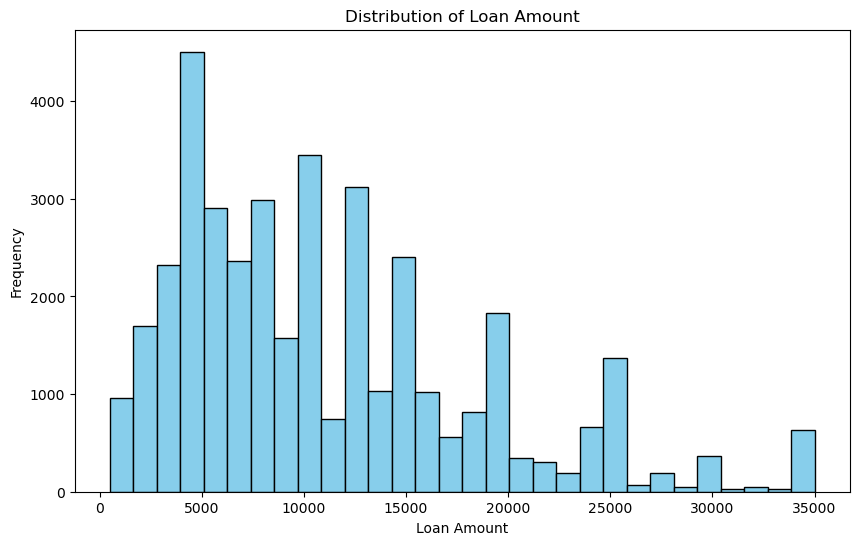

In [144]:
# Plot the distribution of the loan amount
plt.figure(figsize=(10, 6))
plt.hist(loan_df['loan_amnt'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

The graph above shows the distribution of loan amounts in the dataset. The x-axis represents the loan amount, and the y-axis represents the frequency of each loan amount. 

From the graph, we can observe that the loan amounts are distributed across a range of values, with a peak around the lower loan amounts. This indicates that a significant number of loans in the dataset are for smaller amounts, while fewer loans are for larger amounts.

This distribution provides an initial understanding of the range and frequency of loan amounts in the dataset.

# Segmented univariate analysis:
Segmented univariate analysis involves breaking down a dataset into different segments or subgroups based on the values of a categorical variable and then performing separate univariate analyses on each segment.The goal is to understand if there are variations or patterns in the variable of interest across different segments.

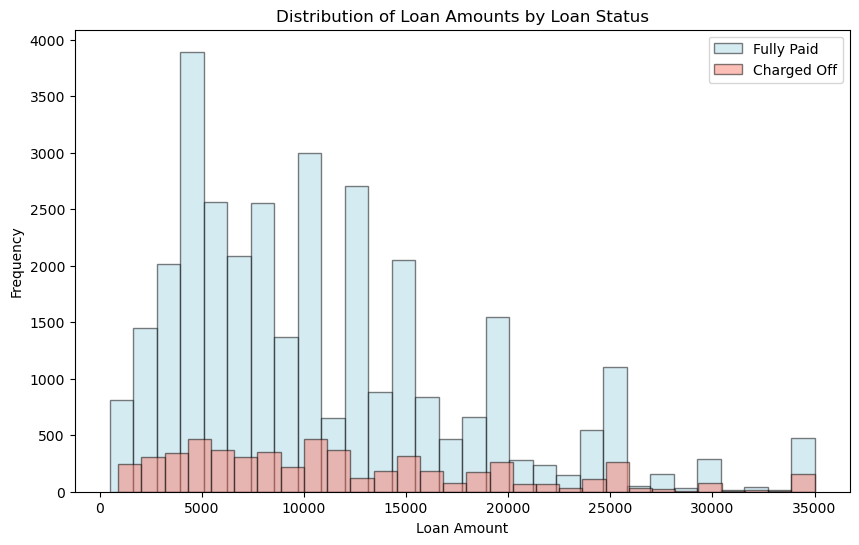

In [146]:
# Plot the distribution of loan amounts based on loan status
plt.figure(figsize=(10, 6))
plt.hist(loan_df[loan_df['loan_status'] == 'Fully Paid']['loan_amnt'], bins=30, color='lightblue', edgecolor='black', alpha=0.5, label='Fully Paid')
plt.hist(loan_df[loan_df['loan_status'] == 'Charged Off']['loan_amnt'], bins=30, color='salmon', edgecolor='black', alpha=0.5, label='Charged Off')
plt.title('Distribution of Loan Amounts by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The histogram shows the distribution of loan amounts for loans that are "Fully Paid" and "Charged Off". The x-axis represents the loan amount, and the y-axis represents the frequency of each loan amount.

The graph provides a visual comparison of the distribution of loan amounts for fully paid and charged off loans, allowing for a better understanding of how loan amounts are related to loan status. 

# Segmented univariate analysis on funded_amnt, grade fields



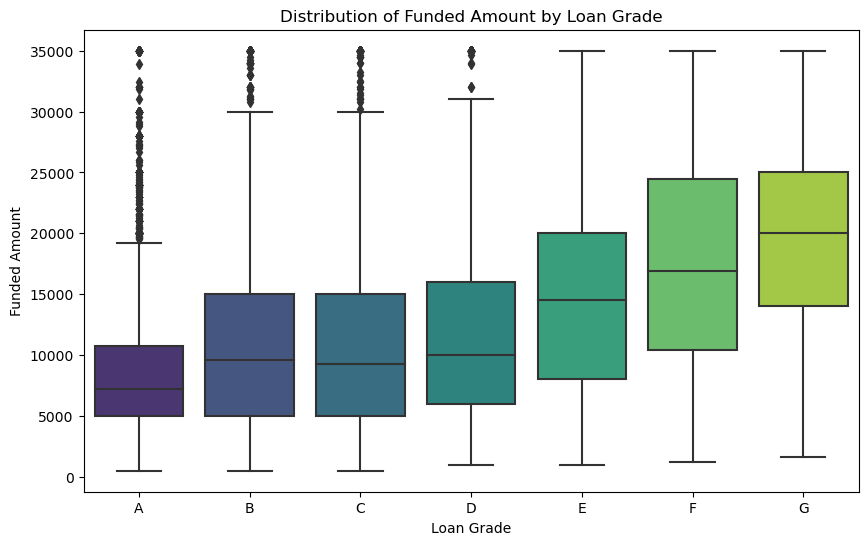

In [147]:
# Plot the distribution of funded amount based on loan grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='funded_amnt', data=loan_df, palette='viridis')
plt.title('Distribution of Funded Amount by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Funded Amount')
plt.show()

The segmented univariate analysis showing the distribution of funded amount based on loan grade. The boxplot visualizes the distribution of funded amounts for different loan grades, allowing for a comparison of the funded amounts across different loan grades. This provides insights into how the funded amount varies with loan grade. 

### Finding Outliers

- Outliers may spoil the result of analysis. So, it is recommended to remove those before proceeding with finding out the insights.

In [148]:
loan_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,loan_issue_year,emp_length_years,term_months,int_rate_percentage,annual_inc_lakhs,Profit_or_Loss,loan_income_ratio,revol_util_percentage
count,"38,577.00","38,577.00","38,577.00","38,577.00","38,577.00","38,577.00","38,577.00","38,577.00","38,577.00","38,577.00","38,577.00","38,577.00","38,577.00","38,577.00","38,577.00","38,577.00","38,577.00","38,577.00","38,577.00","38,577.00","38,577.00","38,577.00","38,577.00","38,577.00"
mean,"11,047.03","10,784.06","10,222.48",322.47,"68,777.97",13.27,"13,289.49",22.05,"11,866.97","11,271.20","9,648.32","2,119.24",1.37,98.04,12.77,"2,746.24","2,010.31",5.13,41.90,11.93,68.78,9.33,18.21,48.70
std,"7,348.44","7,090.31","7,022.72",208.64,"64,218.68",6.67,"15,866.49",11.43,"8,809.86","8,700.85","7,009.38","2,389.50",7.32,698.65,150.84,"4,494.65",0.88,3.52,10.33,3.69,64.22,26.63,11.23,28.35
min,500.00,500.00,0.00,15.69,"4,000.00",0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,007.00",0.50,36.00,5.42,4.00,-100.00,0.08,0.00
25%,"5,300.00","5,200.00","5,000.00",165.74,"40,000.00",8.13,"3,650.00",13.00,"5,513.50","5,019.59","4,500.00",643.99,0.00,0.00,0.00,217.42,"2,010.00",2.00,36.00,8.94,40.00,8.31,9.62,25.20
50%,"9,600.00","9,550.00","8,733.44",277.86,"58,868.00",13.37,"8,762.00",20.00,"9,674.05","9,066.66","8,000.00","1,300.45",0.00,0.00,0.00,568.26,"2,011.00",4.00,36.00,11.71,58.87,14.49,16.00,49.00
75%,"15,000.00","15,000.00","14,000.00",425.55,"82,000.00",18.56,"16,912.00",29.00,"16,136.95","15,329.78","13,175.00","2,671.98",0.00,0.00,0.00,"3,447.25","2,011.00",9.00,36.00,14.38,82.00,21.49,24.55,72.20
max,"35,000.00","35,000.00","35,000.00","1,305.19","6,000,000.00",29.99,"149,588.00",90.00,"58,563.68","58,563.68","35,000.02","23,563.68",180.20,"29,623.35","7,002.19","36,115.20","2,011.00",10.00,60.00,24.40,"6,000.00",68.89,83.00,99.90


- Observation: We could see there is a huge variation in the 50th and max of **annual_inc** column. 

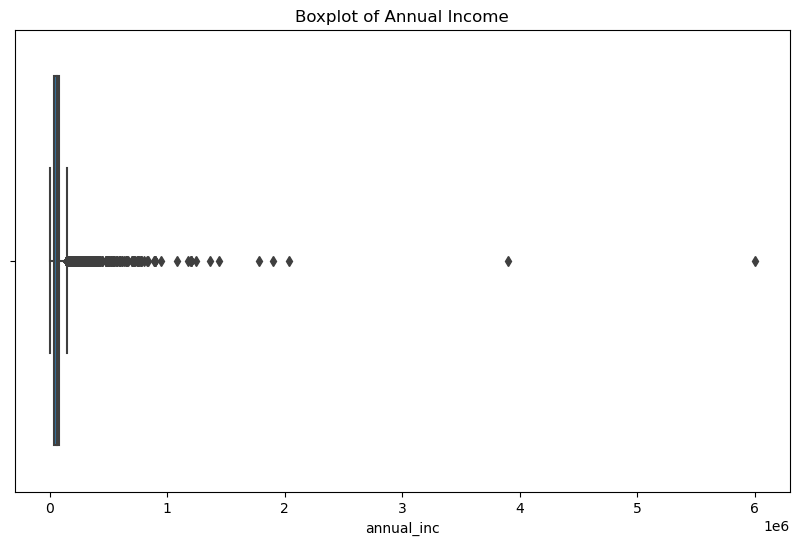

In [149]:
plt.figure(figsize=(10,6))
sns.boxplot(x=loan_df['annual_inc'])
plt.title('Boxplot of Annual Income')
plt.show()

# Bivariate analysis :
Bivariate analysis is a statistical analysis technique that involves the simultaneous examination of the relationships between two variables. The primary goal of bivariate analysis is to determine whether there is a correlation or association between the two variables. It helps to understand how changes in one variable relate to changes in another

Below is the boxplot visualization of the 'annual_inc' column after removing the outliers. The visualization shows the distribution of annual income without the outliers, providing a clearer view of the central tendency and spread of the data. 

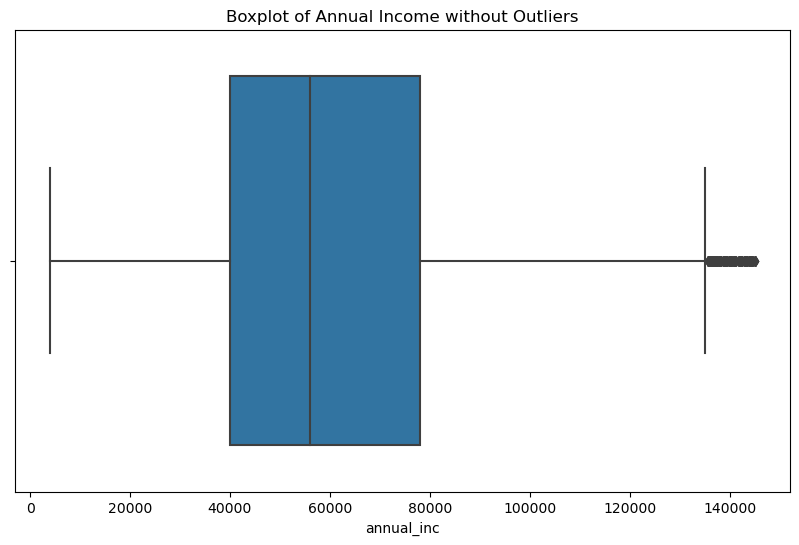

In [150]:
Q1 = loan_df['annual_inc'].quantile(0.25)
Q3 = loan_df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
loan_df_no_outliers = loan_df[(loan_df['annual_inc'] > lower_bound) & (loan_df['annual_inc'] < upper_bound)]

plt.figure(figsize=(10,6))
sns.boxplot(x=loan_df_no_outliers['annual_inc'])
plt.title('Boxplot of Annual Income without Outliers')
plt.show()

## Data Visualization on Loan dataset

In [151]:
## Final dataset for Exploratory Data Analytics
df = loan_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 38577 non-null  float64 
 1   funded_amnt               38577 non-null  float64 
 2   funded_amnt_inv           38577 non-null  float64 
 3   installment               38577 non-null  float64 
 4   grade                     38577 non-null  category
 5   sub_grade                 38577 non-null  category
 6   home_ownership            38577 non-null  category
 7   annual_inc                38577 non-null  float64 
 8   verification_status       38577 non-null  category
 9   loan_status               38577 non-null  category
 10  purpose                   38577 non-null  category
 11  addr_state                38577 non-null  category
 12  dti                       38577 non-null  float64 
 13  delinq_2yrs               38577 non-null  cate

# Here is the boxplot visualization of the 'loan_amnt' column, showing the distribution of loan amounts. The boxplot provides a visual representation of the central tendency, spread, and potential outliers in the loan amount data. 

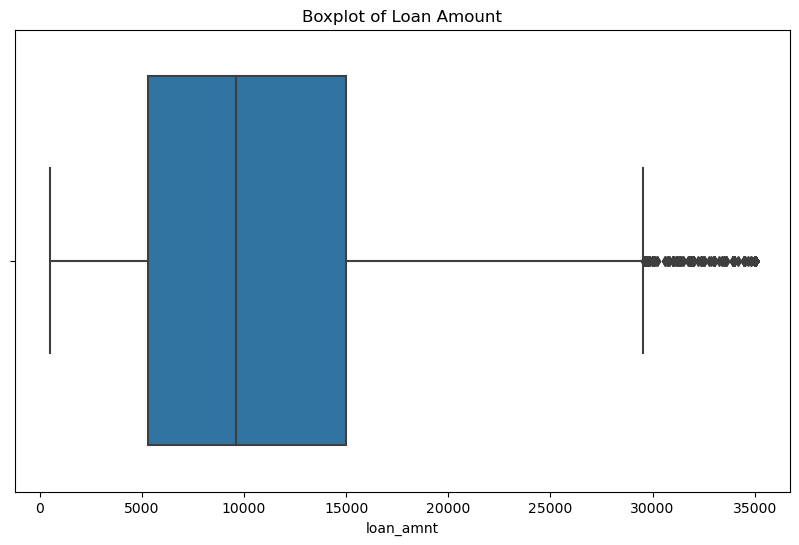

In [152]:
plt.figure(figsize=(10,6))
sns.boxplot(x=loan_df['loan_amnt'])
plt.title('Boxplot of Loan Amount')
plt.show()

# Here is the count plot visualization of the 'loan_status' column, showing the frequency of each loan status category. The visualization provides a clear representation of the distribution of loans across different status categories. The title of the plot is "Loan status of finance company".

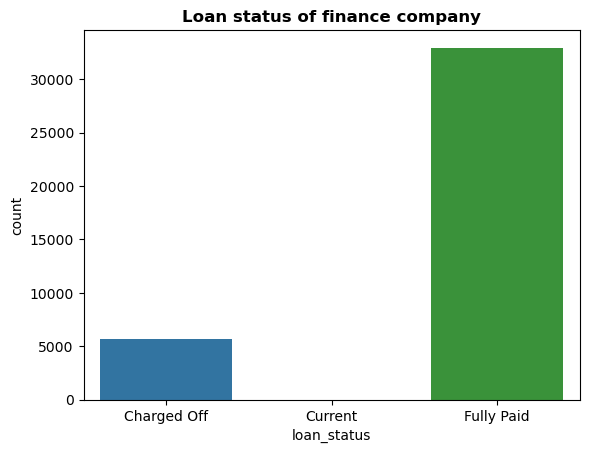

In [153]:
sns.countplot(x= loan_df["loan_status"])
plt.title("Loan status of finance company",fontsize=12,fontweight="bold")
plt.show()

In [154]:
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current            0
Name: loan_status, dtype: int64

# Here is the count plot visualization of the 'grade' column, showing the number of loan applicants based on their grade. The visualization provides a clear representation of the distribution of loan applicants across different grade categories. The title of the plot is "Number of loan applicants based on grade". 
#### Inferences

- Loan applicants are __higher__ who are in the __garde B__.
- Second place is __grade A__.
- __Least__ number of loan is applied by __grade G__.

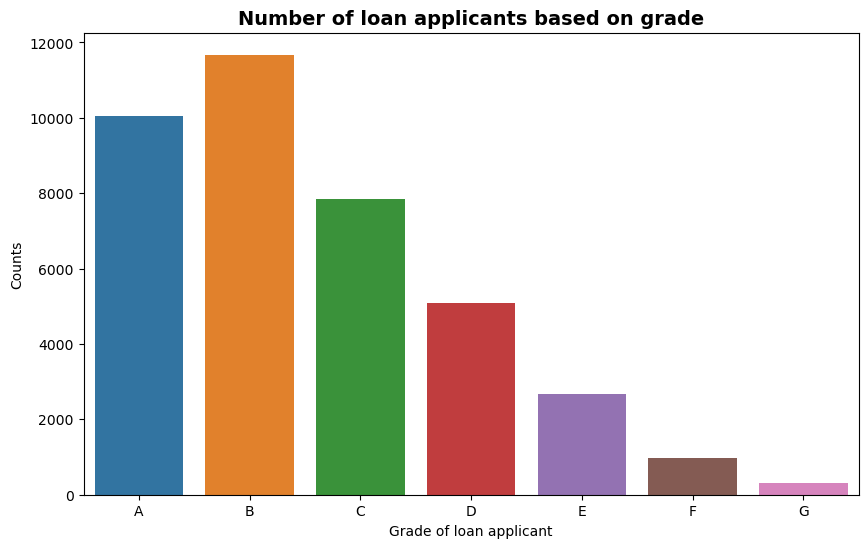

In [155]:
plt.figure(figsize=(10,6))
sns.countplot(x='grade', data=loan_df)
plt.xlabel('Grade of loan applicant')
plt.ylabel('Counts')
plt.title('Number of loan applicants based on grade',fontsize=14,fontweight='bold')
plt.show()

# Loan Amout Vs Applicant Income

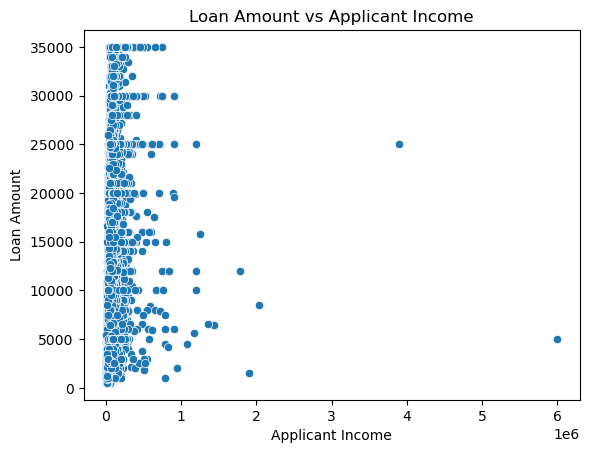

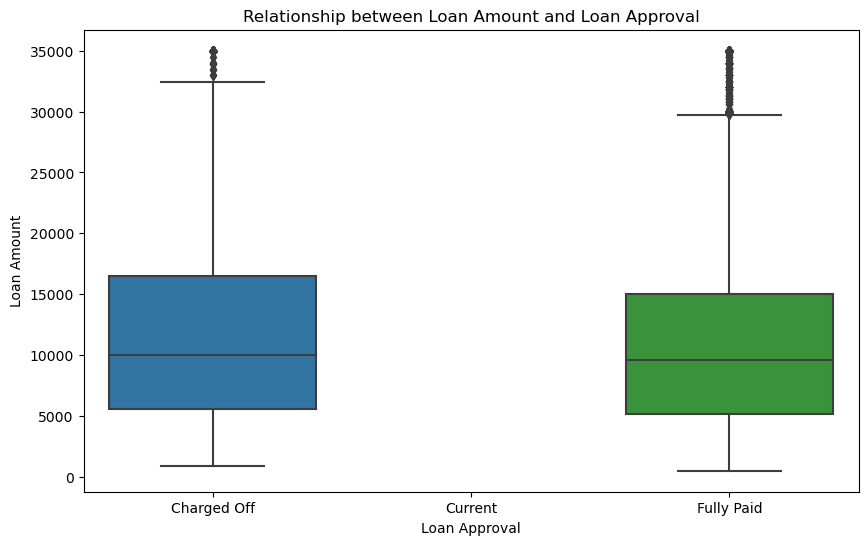

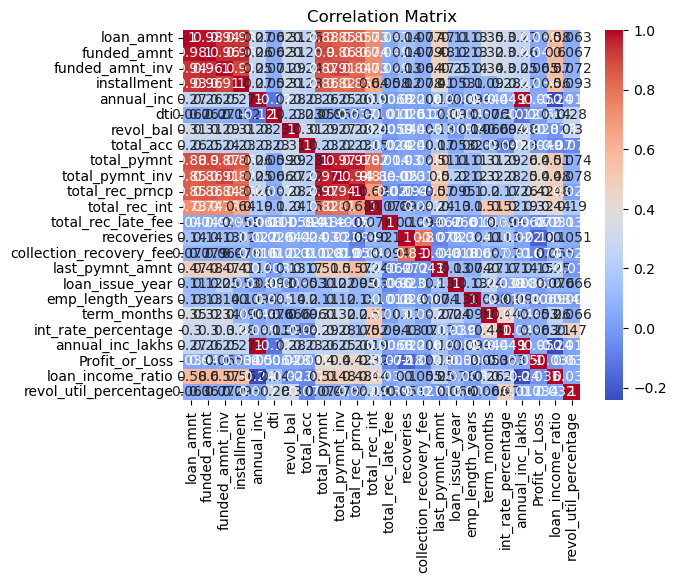

In [156]:
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt

# Load the loan dataset (replace 'your_loan_dataset.csv' with the actual file path)
#loan_df = pd.read_csv('your_loan_dataset.csv')

# Explore the dataset
#print(loan_df.head())

# Bivariate Analysis
# Example: Relationship between Loan Amount and Applicant's Income using a scatter plot
sns.scatterplot(x='annual_inc', y='loan_amnt', data=loan_df)
plt.title('Loan Amount vs Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

# Example: Relationship between Loan Amount and Loan Approval using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_df)
plt.title('Relationship between Loan Amount and Loan Approval')
plt.xlabel('Loan Approval')
plt.ylabel('Loan Amount')
plt.show()

# Example: Correlation matrix to quantify relationships between numerical variables
correlation_matrix = loan_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### Inferences

- Loan applicants are __higher__ who are in the __garde B__.
- Second place is __grade A__.
- __Least__ number of loan is applied by __grade G__.

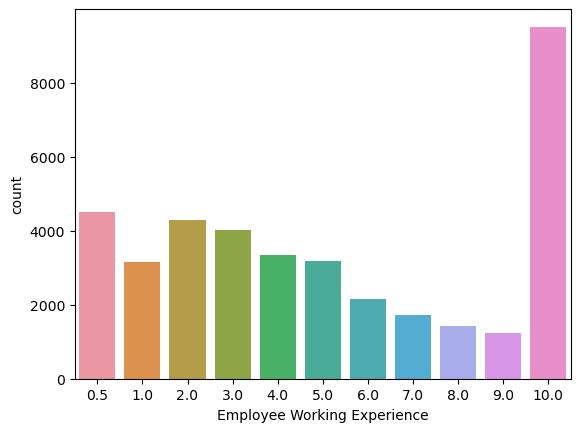

In [157]:
sns.countplot(x='emp_length_years', data=loan_df)
plt.xlabel('Employee Working Experience')
plt.show()

#### Inferences

- Number of __loan applicants are higher__ having work experience __10 years__.
- Second place is applicants having work experience __2 years__.
- Followed by __3 years__.

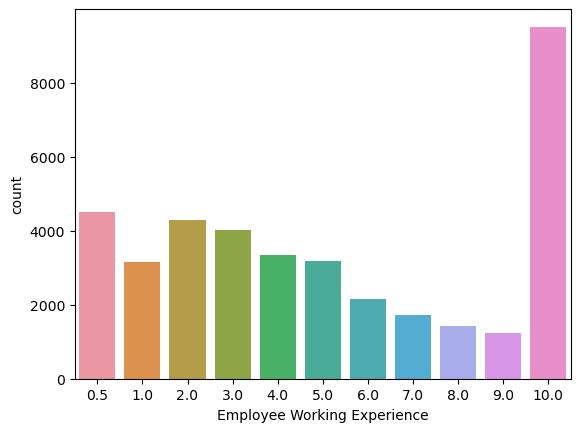

In [158]:
sns.countplot(x='emp_length_years', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

#### Inferences
 - Applicants havinng __10 years__ of experience are maximum applicant for loan and are __high in numbers to be Fully Paid__.
  - Applicants having __9 years__ of experience has __ratio Fully paid higher__ than __that of Charged off__.

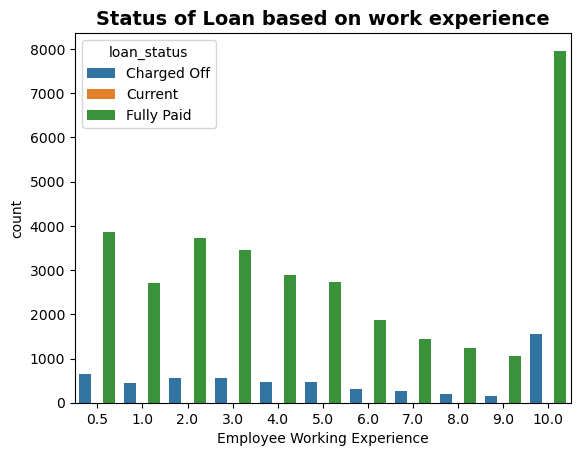

In [159]:
sns.countplot(x='emp_length_years', hue='loan_status', data=df)
plt.xlabel('Employee Working Experience')
plt.title("Status of Loan based on work experience",fontsize=14,fontweight="bold")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


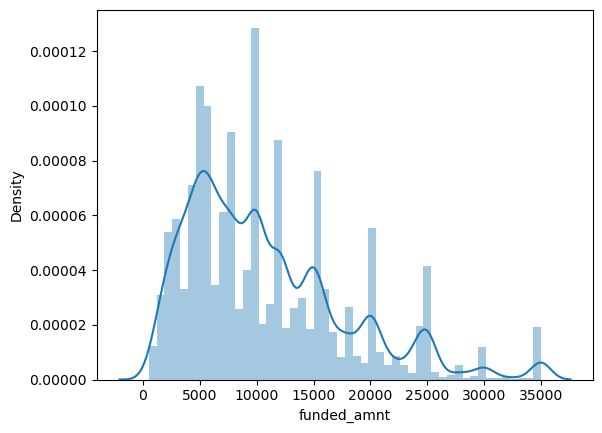

In [160]:
sns.distplot(df['funded_amnt'])
plt.show()

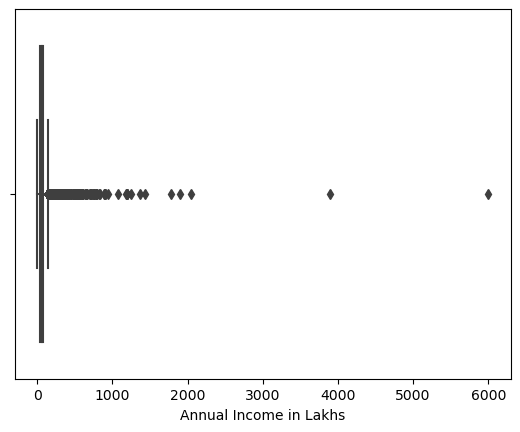

In [161]:
sns.boxplot(x=df['annual_inc_lakhs'])
plt.xlabel('Annual Income in Lakhs')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


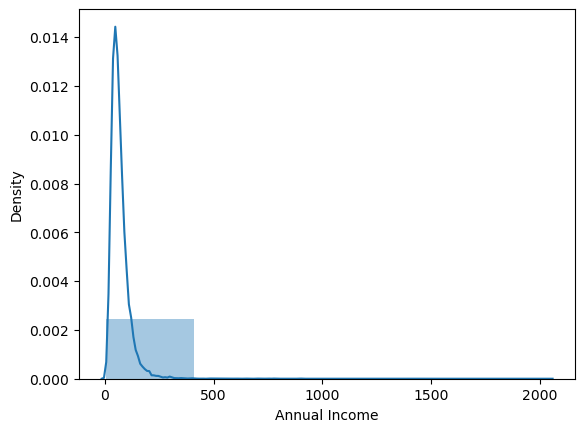

In [162]:
sns.distplot(df[df['annual_inc_lakhs'] < 3000]['annual_inc_lakhs'], bins=5)
plt.xlabel('Annual Income')
plt.show()

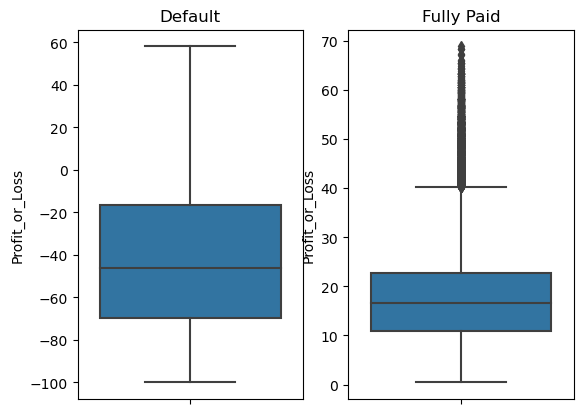

In [163]:
#Relationship of Funded Amount with defaults
plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=df[df.loan_status=='Charged Off'].Profit_or_Loss)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=df[df.loan_status=='Fully Paid'].Profit_or_Loss)
plt.show()

#### Inferences

- Interest rate percentage increases as the grade gets changed.
- Applicant's with grade as __A__ has interest rate median at __7.5%__. Maximum interest rate goes upto __9%__.
- Interest rate is higher foe applicants who are in the grade __G__.

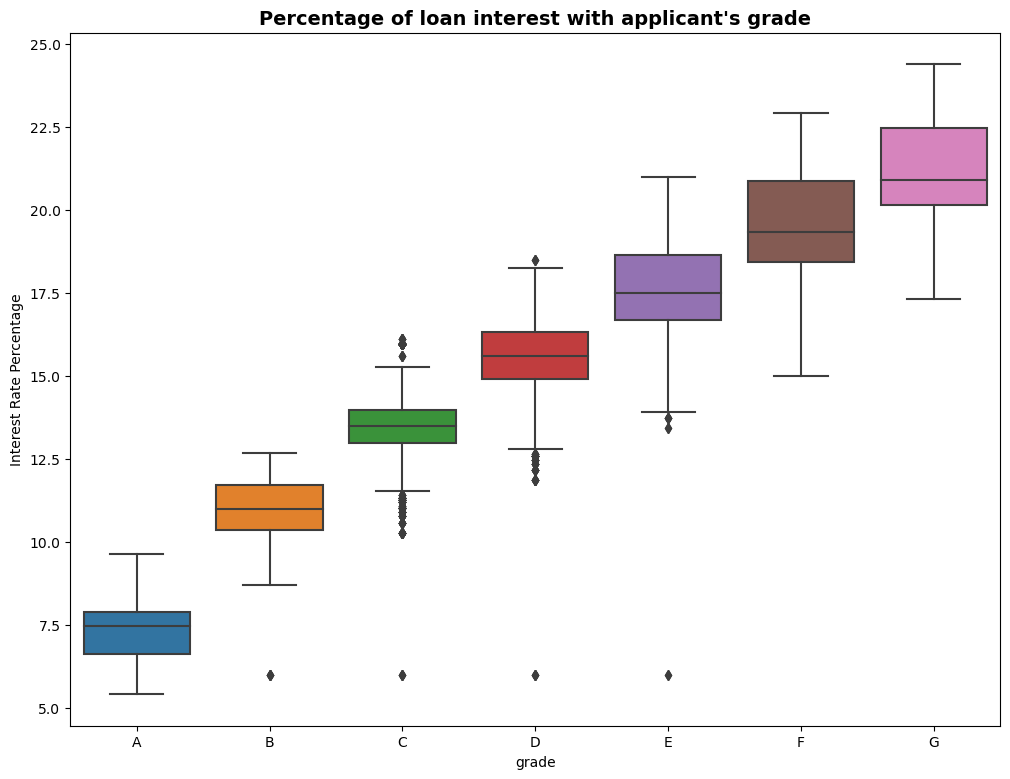

In [164]:
plt.figure(figsize=(12,9))
sns.boxplot(y='int_rate_percentage', x='grade', data=df)
plt.ylabel('Interest Rate Percentage')
plt.title("Percentage of loan interest with applicant's grade",fontsize=14,fontweight="bold")
plt.show()

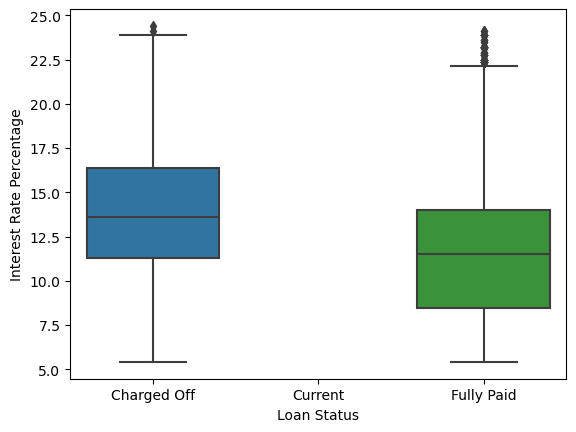

In [165]:
sns.boxplot(y='int_rate_percentage', x='loan_status', data=df)
plt.ylabel('Interest Rate Percentage')
plt.xlabel('Loan Status')
plt.show()

#### Inferences

- Maximum number of loan is lend for the purpose of __debt_consolidation__ and it has high chance to be fully paid, it also has maximum number od Charged off compared to other purpose of loan.

- Less number of loan is granted to __Education__, __Renewable energy__.

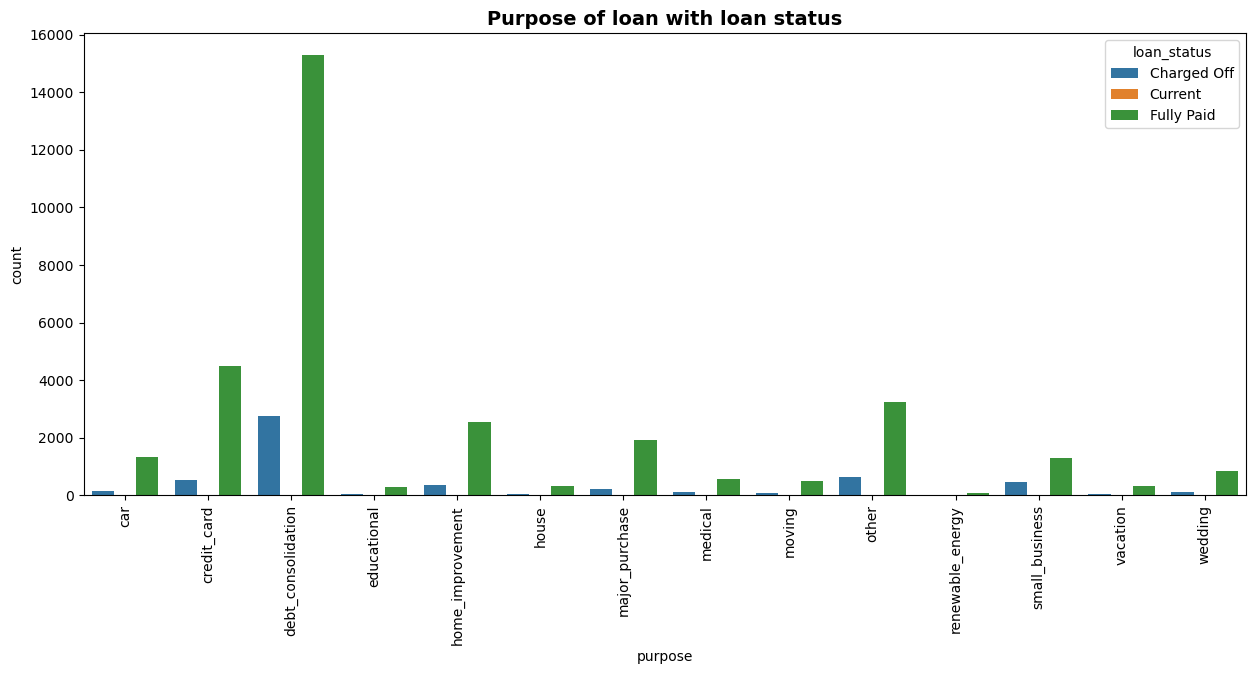

In [166]:
plt.figure(figsize=(15,6))
sns.countplot(x='purpose', hue="loan_status", data=df)
plt.xticks(rotation=90)
plt.title("Purpose of loan with loan status",fontsize=14,fontweight="bold")
plt.show()

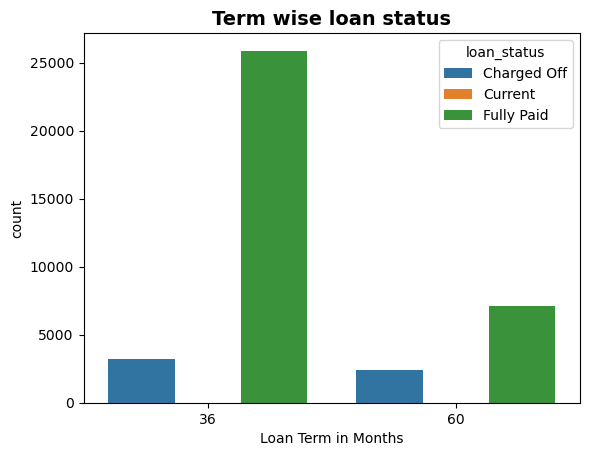

In [167]:
sns.countplot( x="term_months", hue='loan_status', data=df)
plt.xlabel('Loan Term in Months')
plt.title("Term wise loan status",fontsize=14,fontweight="bold")
plt.show()

#### Inferences

- Loan is granted to applicants for all purposes either for 36 months or 60 months.
- __debt_consolidation__ leade high in both the terms followed by __credit_card__.
- Most of the loan applicants are given 36 months for the loan term.

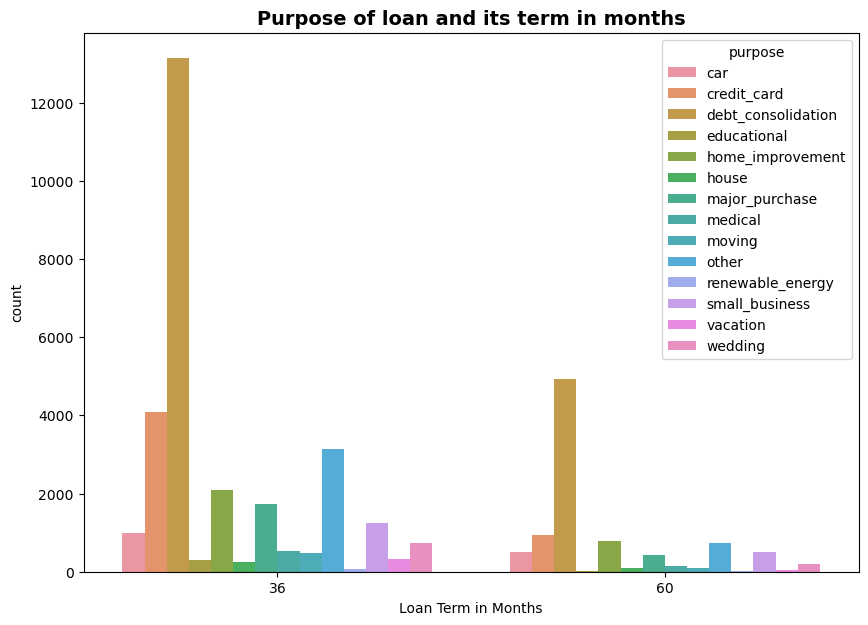

In [168]:
plt.figure(figsize=(10,7))
sns.countplot( x="term_months", hue='purpose', data=df)
plt.xlabel('Loan Term in Months')
plt.title("Purpose of loan and its term in months",fontsize=14,fontweight="bold")
plt.show()

#### Inferences

- __High possibility__ of loan amount being __Fully paid__ when the applicant is in __Rented house__.
- Followed by __Mortgage in the second place__.

- __Less chance__ to be __Charged off__ when the applicant has __own house__.

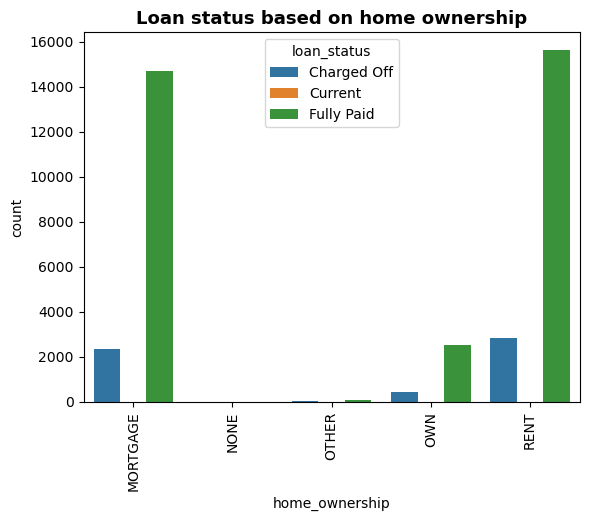

In [169]:
sns.countplot(x='home_ownership',hue='loan_status', data=df)
plt.xticks(rotation=90)
plt.title('Loan status based on home ownership',fontsize =13,fontweight = "bold")
plt.show()

#### Inferences

- No.of public record bankruptcies for zero is high.
- Most of the loan applicants have no record for public record bankruptcies.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


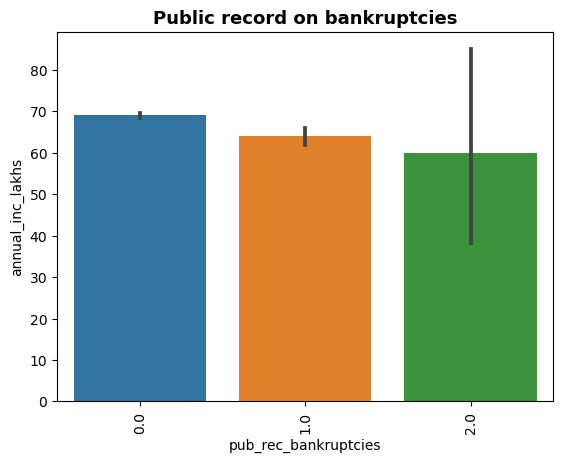

In [170]:
sns.barplot(y='annual_inc_lakhs', x='pub_rec_bankruptcies', data=df)
plt.xticks(rotation=90)
plt.title('Public record on bankruptcies',fontsize =13,fontweight = "bold")
plt.show()

#### inferences

- Correlation exists between 
  - __loan_amnt__ and __total_pymnt__.
  - __total_pymnt_inv__ and __funded_amnt_inv__.

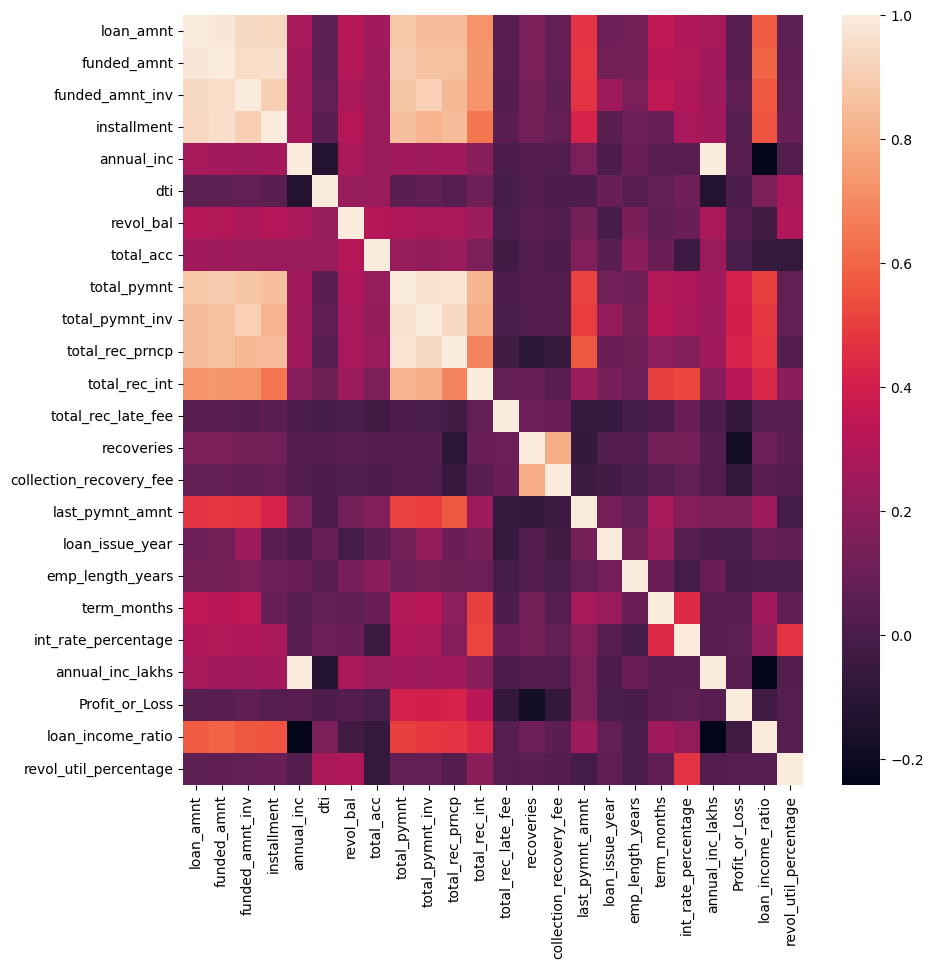

In [171]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

## Income Analysis

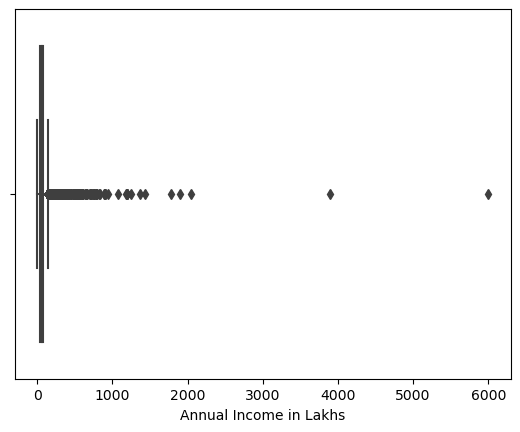

In [180]:
sns.boxplot(x=df['annual_inc_lakhs'])
plt.xlabel('Annual Income in Lakhs')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


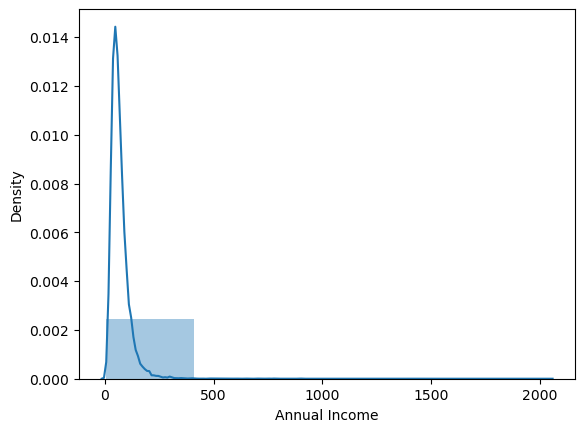

In [181]:
sns.distplot(df[df['annual_inc_lakhs'] < 3000]['annual_inc_lakhs'], bins=5)
plt.xlabel('Annual Income')
plt.show()

#### Inferences

- __Highest number__ of charged off were from the state __CA__.
- Followed by __FL, NY, TX__.

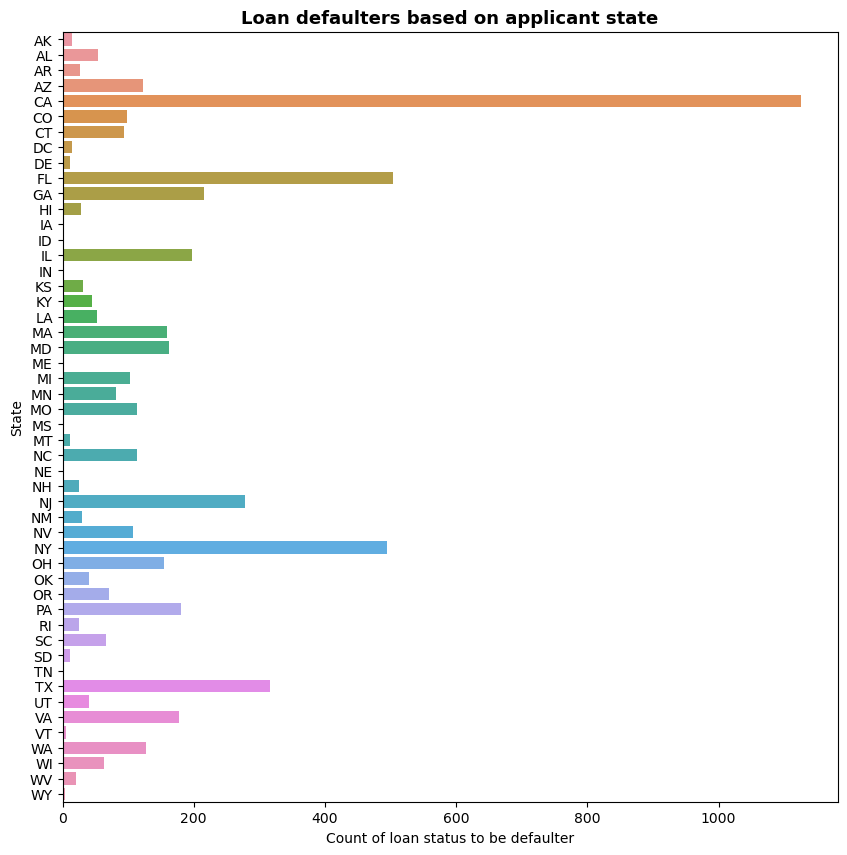

In [172]:
g = df[df['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.title('Loan defaulters based on applicant state',fontsize =13,fontweight = "bold")
plt.show()

#### Inferences

- In the __year 2007__, __less number of loans__ weree granted by the finance company.
- There is gradual growth in number of loan grants over the years.
- In the __year 2009__, loan was granted to __more than 5000 applicants__.
- __Maximum__ number of __loan__ was granted in the __year 2011__.

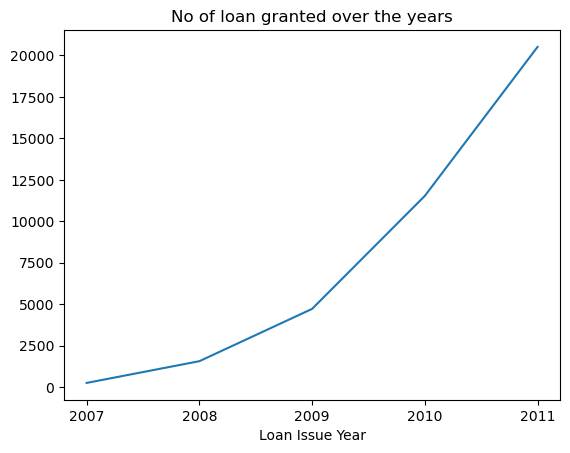

In [173]:
g = df.groupby('loan_issue_year')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

#### Inferences
- When analysing profit and loss pattern on the company with respect to loan status,
  - Profit value ranges upto 20
  - And Loss would go upto -40 in the scale.
 
- We could infer that there is more number of charged off compared to fully paid 

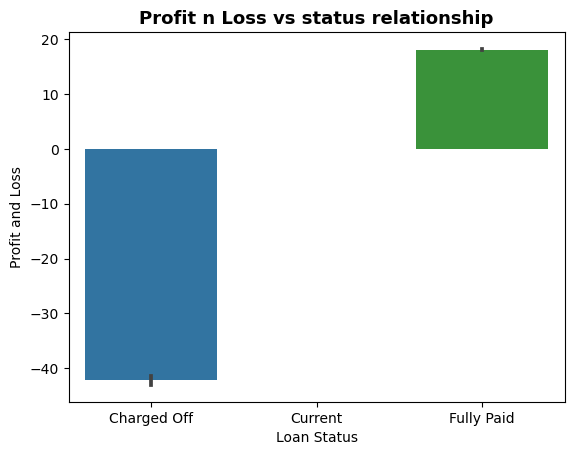

In [174]:
# Relationship of default with funded amount with a barplot
sns.barplot(x='loan_status',y='Profit_or_Loss',data=df)
plt.xlabel("Loan Status")
plt.ylabel("Profit and Loss")
plt.title("Profit n Loss vs status relationship",fontsize=13,fontweight='bold')
plt.show()

#### Inferences
- **Top 3 purpose for Charged off**
  - __High number of Charged-off__ can be found when laon is lend to the purpose of __Small Business__.
  - Followed by __debt_consolidation__ in the second place.
  - Third place is __credit_card__
  
- **Top 3 purpose for Fully Paid**
  - When a loan is bought for __house__, there is __high chance to be fully paid__.
  - Followed by __debt_consolidation__ and __small_business__.
  - Less number of fully paid occurs for the purpose of __vacation__.

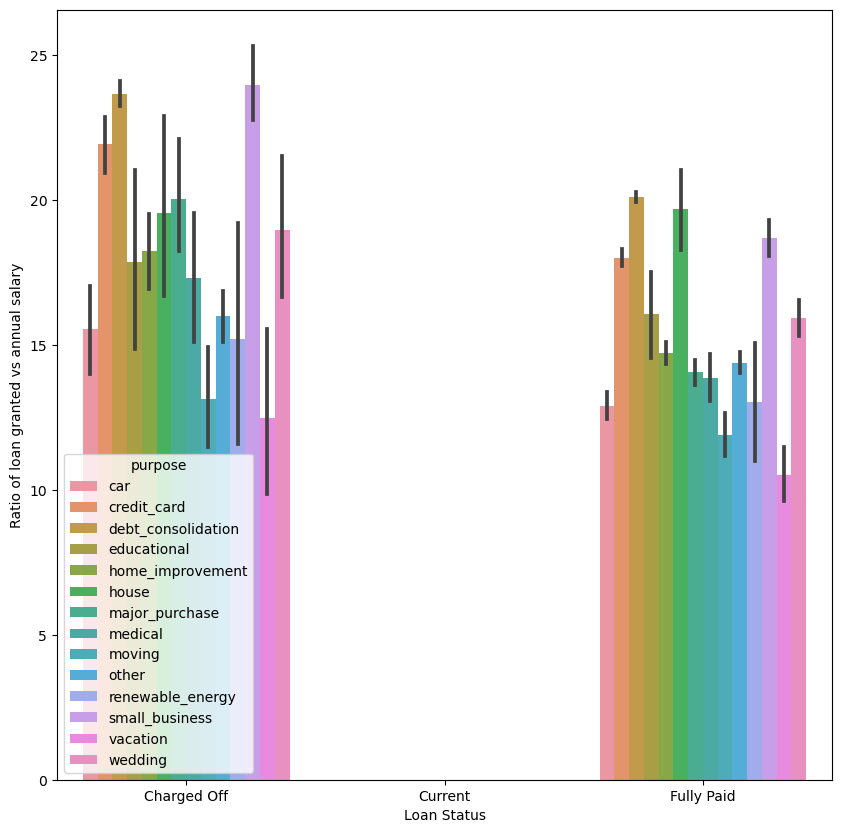

In [175]:
plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='loan_income_ratio',hue='purpose',data=df)
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()

#### Inferences
- When loan amount is granted more than 7 lakhs, Charged-off count is less than that of Fully paid.

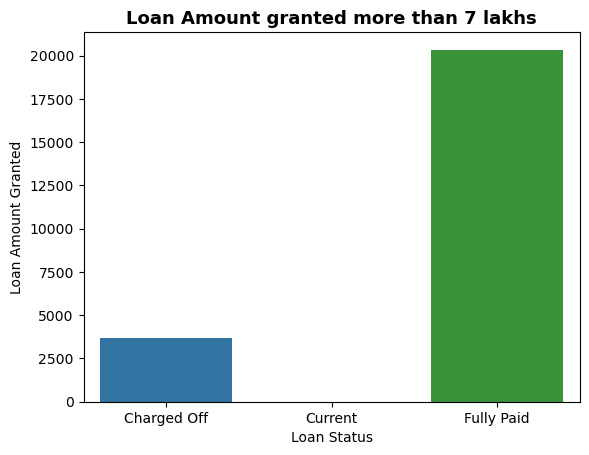

In [176]:
df_agg = df[df['funded_amnt'] > 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted more than 7 lakhs',fontsize=13,fontweight = "bold")
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

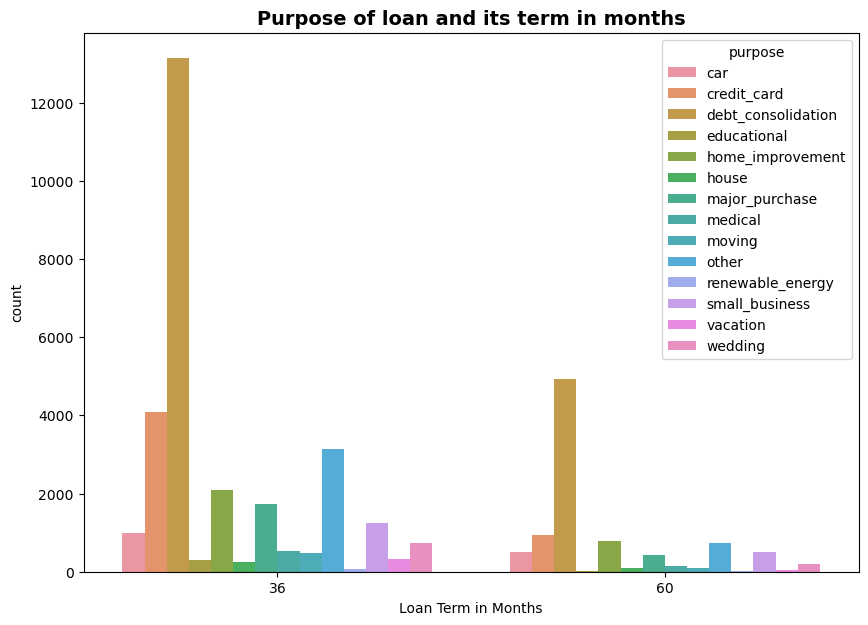

In [177]:
plt.figure(figsize=(10,7))
sns.countplot( x="term_months", hue='purpose', data=loan_df)
plt.xlabel('Loan Term in Months')
plt.title("Purpose of loan and its term in months",fontsize=14,fontweight="bold")
plt.show()

#### Inferences
- __Maximum__ loan which is lend to applicants are __fully paid__ who are __Not Verified__
- __Lowest__ number of __charged-off__ are achieved when the applicant's __source is verified__.

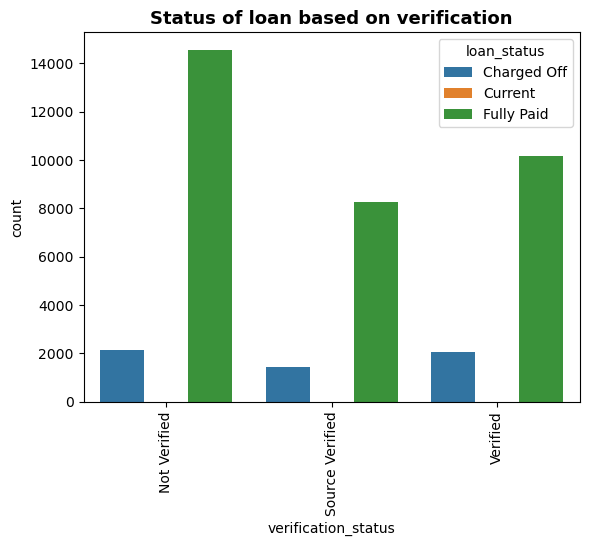

In [178]:
sns.countplot(x='verification_status',hue='loan_status', data=loan_df)
plt.xticks(rotation=90)
plt.title('Status of loan based on verification',fontsize=13,fontweight = "bold")
plt.show()

#### Inferences
- Range of interest for applicant's years of service tells
  - low range remains constant irrespective of years of service.
  - Maximun Interest rate is found for applicant having 7 years of service.
  - 50% of applicant who has 10 years od experience has interest rate between 11.5 to 12.5
  - Maximun number of applicants have higher interest rate falling under 10 years of experience.

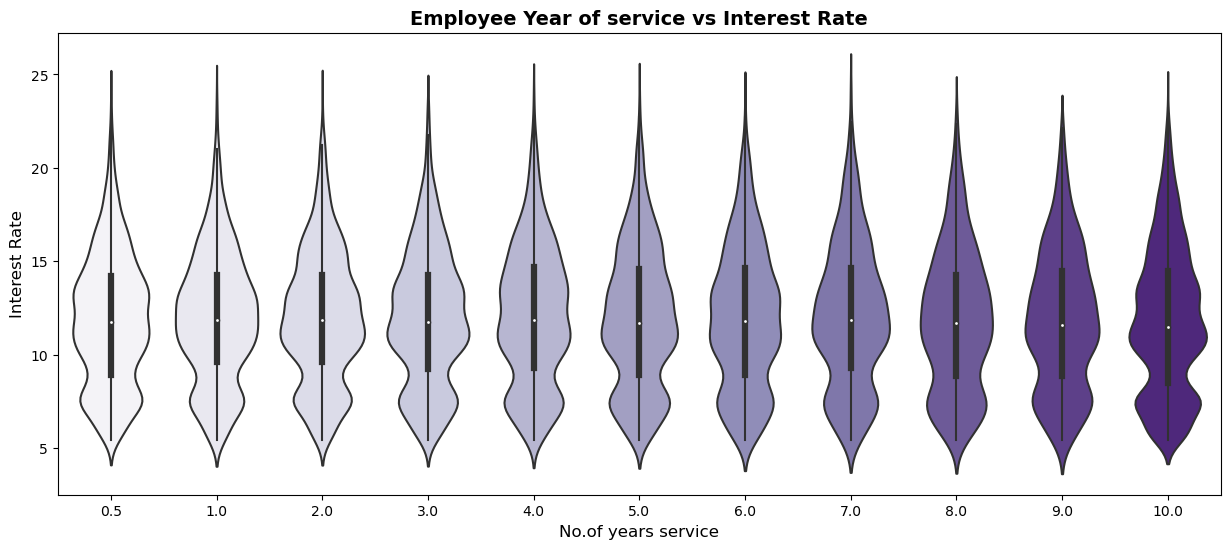

In [179]:
plt.figure(figsize=(15,6))
ax = sns.violinplot(y='int_rate_percentage', x='emp_length_years',data =df,palette='Purples')
ax.set_title('Employee Year of service vs Interest Rate',fontsize=14, fontweight = "bold")
ax.set_ylabel('Interest Rate',fontsize=12)
ax.set_xlabel('No.of years service',fontsize=12)
plt.show()